# <a id='toc1_'></a>[Machine Learning](#toc0_)

**Season:** 03

**Lesson id:** 06

**Time:** 00:00:00

---

**Table of contents**<a id='toc0_'></a>    
- [Machine Learning](#toc1_)    
  - [01 - Introduction](#toc1_1_)    
  - [02 - Regression](#toc1_2_)    
    - [Lesson 06: numpy](#toc1_2_1_)    
    - [Lesson 07: pandas](#toc1_2_2_)    
    - [Lesson 08: matplotlib](#toc1_2_3_)    
    - [Lesson 09: Simple Regression](#toc1_2_4_)    
    - [Lesson 12: Multipe Linear Regression](#toc1_2_5_)    
    - [Lesson 14: Polynomial Regression](#toc1_2_6_)    
    - [Lesson 15: Non Linear Regression Analysis](#toc1_2_7_)    
  - [03 - Classification](#toc1_3_)    
    - [Lesson 05: KNN (K-Nearest Neighbors)](#toc1_3_1_)    
    - [Lesson 09: Decision Trees](#toc1_3_2_)    
    - [Lesson 14: Logistic Regression](#toc1_3_3_)    
    - [Lesson 13: SVM (Support Vector Machines)](#toc1_3_4_)    
  - [04 - Clustering](#toc1_4_)    
    - [Lesson 05: K-Means](#toc1_4_1_)    
    - [Lesson 06: K-Means](#toc1_4_2_)    
    - [Lesson 10: Hierarchial Clustering - Agglomerative](#toc1_4_3_)    
    - [Lesson 11: Hierarchial Clustering - Agglomerative](#toc1_4_4_)    
    - [Lesson 13: DBSCAN](#toc1_4_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import scipy.optimize as opt


Add options

In [3]:
plt.style.use('default')
%matplotlib inline


## <a id='toc1_1_'></a>[01 - Introduction](#toc0_)

Theory.

## <a id='toc1_2_'></a>[02 - Regression](#toc0_)

### <a id='toc1_2_1_'></a>[Lesson 06: numpy](#toc0_)

In [8]:
a = np.arange(15)
a


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
b = a.reshape(3, 5)
b


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [26]:
print(a.shape)
print(b.shape)
print(b.ndim)
print(b.size)

print('-'*15)

print(type(a))
print(type(b))

print('-'*15)

print(a.dtype)
print(b.dtype)


(15,)
(3, 5)
2
15
---------------
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
---------------
int32
int32


In [28]:
np.zeros((3, 4)).astype(np.int32)


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

Some operations

In [32]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)


In [33]:
print(a)
print(b)


[20 30 40 50]
[0 1 2 3]


In [35]:
print(a - b)
print(a * b)
print(a ** b)


[20 29 38 47]
[  0  30  80 150]
[     1     30   1600 125000]


In [36]:
c = a * b
print(c)


[  0  30  80 150]


In [37]:
c > 50


array([False, False,  True,  True])

In [38]:
c[c > 50]


array([ 80, 150])

In [45]:
print(a)
print(np.sin(a))
print(np.max(a))
print(np.argmax(a))


[20 30 40 50]
[ 0.91294525 -0.98803162  0.74511316 -0.26237485]
50
3


In [48]:
print(np.info(a))


class:  ndarray
shape:  (4,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x298e9dc68d0
byteorder:  little
byteswap:  False
type: int32
None


not a number

In [52]:
np.nan


nan

nan to number (nan -> 0)

In [56]:
a = np.array([1, 5, np.nan, 8, np.nan])
np.nan_to_num(a)


array([1., 5., 0., 8., 0.])

Random number from standard norma distribution

In [88]:
np.random.randn(3, 2)


array([[ 1.25961026, -0.99160632],
       [ 0.86262725, -0.21037351],
       [-0.44372129,  0.56006162]])

### <a id='toc1_2_2_'></a>[Lesson 07: pandas](#toc0_)

In [544]:
a = pd.Series([1, 2, 3, 'ali', 0, np.nan, -1])
print(a)

print()

print('Type:', type(a))


0      1
1      2
2      3
3    ali
4      0
5    NaN
6     -1
dtype: object

Type: <class 'pandas.core.series.Series'>


In [545]:
dates = pd.date_range('2021-01-01', periods=6, freq='D')
dates


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [546]:
rnd = np.random.randn(6, 4)
print(rnd)


[[-2.4561981  -0.53723824  0.22037337 -0.373378  ]
 [ 0.03266621 -0.10425706 -0.08829907 -0.66278687]
 [-1.36150232  0.77194402  0.08195671 -0.10030524]
 [-1.43789408  0.16451032 -0.87070853  0.6108024 ]
 [-0.21534626  0.17321792 -0.58840575  1.85349805]
 [-1.21315302  0.33090843 -0.08670112  0.34150258]]


In [547]:
df = pd.DataFrame(rnd)
print(df)  # with print() function


          0         1         2         3
0 -2.456198 -0.537238  0.220373 -0.373378
1  0.032666 -0.104257 -0.088299 -0.662787
2 -1.361502  0.771944  0.081957 -0.100305
3 -1.437894  0.164510 -0.870709  0.610802
4 -0.215346  0.173218 -0.588406  1.853498
5 -1.213153  0.330908 -0.086701  0.341503


In [548]:
df = pd.DataFrame(rnd)
df  # without print() function; *Recommended*


,0,1,2,3
0,-2.456198,-0.537238,0.220373,-0.373378
1,0.032666,-0.104257,-0.088299,-0.662787
2,-1.361502,0.771944,0.081957,-0.100305
3,-1.437894,0.164510,-0.870709,0.610802
4,-0.215346,0.173218,-0.588406,1.853498
5,-1.213153,0.330908,-0.086701,0.341503


change index (index is rows name)

In [549]:
df = pd.DataFrame(rnd, index=dates)
df


,0,1,2,3
2021-01-01,-2.456198,-0.537238,0.220373,-0.373378
2021-01-02,0.032666,-0.104257,-0.088299,-0.662787
2021-01-03,-1.361502,0.771944,0.081957,-0.100305
2021-01-04,-1.437894,0.164510,-0.870709,0.610802
2021-01-05,-0.215346,0.173218,-0.588406,1.853498
2021-01-06,-1.213153,0.330908,-0.086701,0.341503


change Columns name

In [550]:
df = pd.DataFrame(rnd, index=dates, columns=['A', 'B', 'C', 'D'])
df


,A,B,C,D
2021-01-01,-2.456198,-0.537238,0.220373,-0.373378
2021-01-02,0.032666,-0.104257,-0.088299,-0.662787
2021-01-03,-1.361502,0.771944,0.081957,-0.100305
2021-01-04,-1.437894,0.164510,-0.870709,0.610802
2021-01-05,-0.215346,0.173218,-0.588406,1.853498
2021-01-06,-1.213153,0.330908,-0.086701,0.341503


Get count of every value

In [554]:
df.A.value_counts()


-2.456198    1
 0.032666    1
-1.361502    1
-1.437894    1
-0.215346    1
-1.213153    1
Name: A, dtype: int64

Or

In [555]:
df['A'].value_counts()


-2.456198    1
 0.032666    1
-1.361502    1
-1.437894    1
-0.215346    1
-1.213153    1
Name: A, dtype: int64

In [557]:
df.A.values


array([-2.4561981 ,  0.03266621, -1.36150232, -1.43789408, -0.21534626,
       -1.21315302])

Or

In [558]:
df['A'].values


array([-2.4561981 ,  0.03266621, -1.36150232, -1.43789408, -0.21534626,
       -1.21315302])

Slicing

In [34]:
df.A


2021-01-01   -0.012160
2021-01-02    0.902158
2021-01-03   -0.212657
2021-01-04   -0.398090
2021-01-05   -0.954243
2021-01-06    1.578169
Freq: D, Name: A, dtype: float64

Or

In [35]:
df['A']


2021-01-01   -0.012160
2021-01-02    0.902158
2021-01-03   -0.212657
2021-01-04   -0.398090
2021-01-05   -0.954243
2021-01-06    1.578169
Freq: D, Name: A, dtype: float64

In [144]:
df[['A']]  # with df['A'] works but df[['A']] is Recommended.


,A
2021-01-01,-0.997844
2021-01-02,-0.772336
2021-01-03,-0.944428
2021-01-04,0.077140
2021-01-05,1.060101
2021-01-06,-0.691160


In [156]:
df[['A', 'C']]


,A,C
2021-01-01,-0.997844,1.068288
2021-01-02,-0.772336,-0.729380
2021-01-03,-0.944428,-0.395393
2021-01-04,0.077140,0.477122
2021-01-05,1.060101,-0.662609
2021-01-06,-0.691160,-0.160347


indexing by location of rows

In [141]:
df.iloc[0]  # Not Recommended


A   -0.997844
B    0.546717
C    1.068288
D   -0.221077
Name: 2021-01-01 00:00:00, dtype: float64


In [195]:
df.iloc[[0]]


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077


In [154]:
df.iloc[[0, 2]]


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055


In [197]:
df[2:4]  # Other and Better way


,A,B,C,D
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-04,0.077140,2.428425,0.477122,1.372915


In [198]:
df[2:]


,A,B,C,D
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-05,1.060101,-0.280446,-0.662609,0.189042
2021-01-06,-0.691160,-1.824151,-0.160347,-0.048559


In [200]:
df[:3]


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055


In [208]:
df[0:1]  # for get 0 index of row


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077


In [207]:
# Error
df[0]
df[1]
# ...


KeyError: 0

indexing by name of rows

In [168]:
df.loc[['2021-01-02', '2021-01-04']]


,A,B,C,D
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-04,0.077140,2.428425,0.477122,1.372915


In [157]:
df[['A', 'B']].iloc[[1, 3]]


,A,B
2021-01-02,-0.772336,-0.187045
2021-01-04,0.077140,2.428425


slicing by Condition

by Columns

In [217]:
df[df['A'] > 0]


,A,B,C,D
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-05,1.060101,-0.280446,-0.662609,0.189042


by Rows

In [243]:
df[df.loc[['2021-01-04']] > 1]


,A,B,C,D
2021-01-01,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,NaN,2.428425,NaN,1.372915
2021-01-05,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN


Data types of any columns of data frame

In [108]:
df.dtypes


A    float64
B    float64
C    float64
D    float64
dtype: object

show head of data frame

In [124]:
df.head()  # default=5


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-05,1.060101,-0.280446,-0.662609,0.189042


In [114]:
df.head(3)


,A,B,C,D
2021-01-01,-0.997844,0.546717,1.068288,-0.221077
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055


show tail of data frame

In [116]:
df.tail(2)  # default=5


,A,B,C,D
2021-01-05,1.060101,-0.280446,-0.662609,0.189042
2021-01-06,-0.691160,-1.824151,-0.160347,-0.048559


sample of rows of data frame

In [129]:
df.sample(2)  # default=1


,A,B,C,D
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226


Describe of Columns of data frame

In [158]:
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.378088,0.276974,-0.067053,-0.169660
std,0.804227,1.423670,0.706400,0.975065
min,-0.997844,-1.824151,-0.729380,-1.533226
25%,-0.901405,-0.257096,-0.595805,-0.638061
50%,-0.731748,0.179836,-0.277870,-0.134818
75%,-0.114935,0.870435,0.317755,0.129641
max,1.060101,2.428425,1.068288,1.372915


Access to any row of describle table

In [172]:
df.describe().loc[['mean', '25%']]


,A,B,C,D
mean,-0.378088,0.276974,-0.067053,-0.169660
25%,-0.901405,-0.257096,-0.595805,-0.638061


In [173]:
df.describe()[['A', 'C']].loc[['mean', '25%']]


,A,C
mean,-0.378088,-0.067053
25%,-0.901405,-0.595805


In [175]:
df.describe()[['B']].loc[['mean']]


,B
mean,0.276974


get only numerical value

In [179]:
df.describe()['B'].loc['mean']  # for get only value, remowe one [] in indexing


0.2769735743655458

In [183]:
df['B'].mean()  # Other way


0.2769735743655458

Transpose of data frame

In [209]:
df.T


,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,-0.997844,-0.772336,-0.944428,0.077140,1.060101,-0.691160
B,0.546717,-0.187045,0.978341,2.428425,-0.280446,-1.824151
C,1.068288,-0.729380,-0.395393,0.477122,-0.662609,-0.160347
D,-0.221077,-1.533226,-0.777055,1.372915,0.189042,-0.048559


Sort values by a column

In [214]:
df.sort_values(by='C', ascending=True)


,A,B,C,D
2021-01-02,-0.772336,-0.187045,-0.729380,-1.533226
2021-01-05,1.060101,-0.280446,-0.662609,0.189042
2021-01-03,-0.944428,0.978341,-0.395393,-0.777055
2021-01-06,-0.691160,-1.824151,-0.160347,-0.048559
2021-01-04,0.077140,2.428425,0.477122,1.372915
2021-01-01,-0.997844,0.546717,1.068288,-0.221077


Read and Write operations

Save data frame to a `csv` file in local

In [247]:
df.to_csv('myFileName.csv', sep=',')


Save data frame to a `Excel` file in local

**Prerequisite:** install `openpyxl` module

In [252]:
# !pip install openpyxl


In [253]:
df.to_excel('MyFileName.xlsx')


Save data frame to `ClipBoard` memory

In [248]:
df.to_clipboard()


### <a id='toc1_2_3_'></a>[Lesson 08: matplotlib](#toc0_)

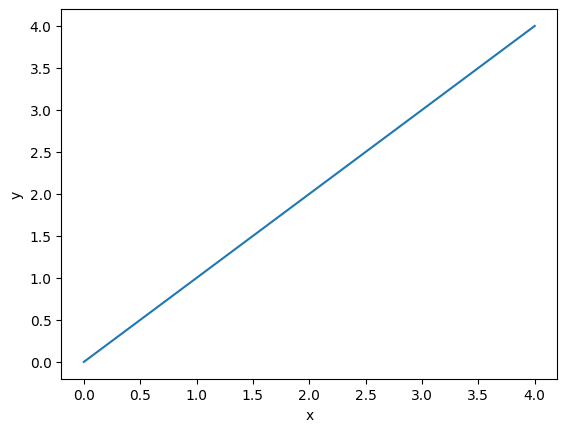

In [65]:
plt.plot([0, 1, 2, 3, 4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


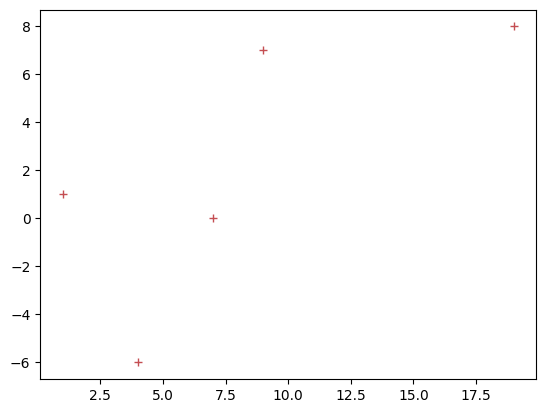

In [66]:
plt.plot([1, 4, 7, 19, 9], [1, -6, 0, 8, 7],
         'r+')
plt.show()


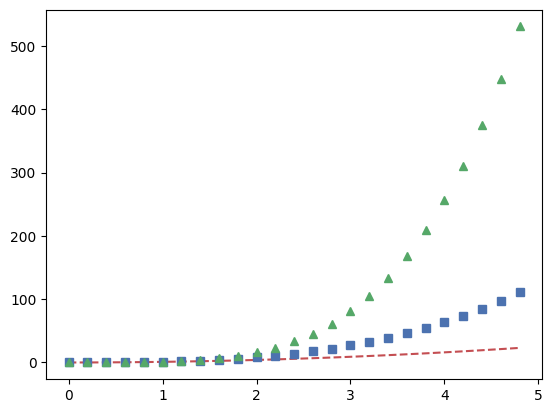

In [67]:
t = np.arange(0, 5, 0.2)

plt.plot(t, t**2, 'r--',
         t, t**3, 'bs',
         t, t**4, 'g^')
plt.show()


In [68]:
data = {
    'a': np.arange(500),
    'b': np.random.randint(0, 50, 500),
    'c': np.random.randn(500)
}


In [69]:
type(data)


dict

In [70]:
data['a'][:10]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

in standard normal distribution, data in around zero

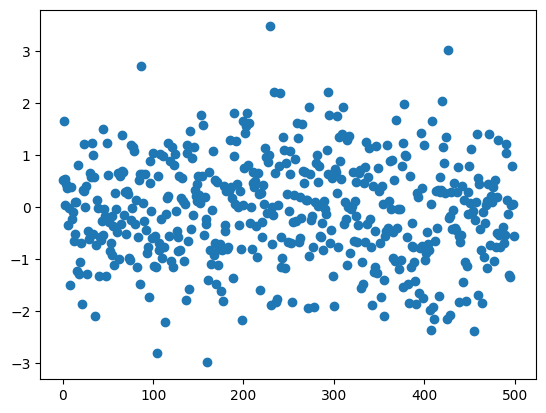

In [71]:
plt.scatter(data['a'], data['c'])
plt.show()


### <a id='toc1_2_4_'></a>[Lesson 09: Simple Regression](#toc0_)

Understanding Data

Load Data

In [23]:
df = pd.read_csv('FuelConsumption.csv')

print(type(df))
df.head()


<class 'pandas.core.frame.DataFrame'>


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [24]:
# Summarize of the data
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select some features to explore more

In [25]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plot each of these features

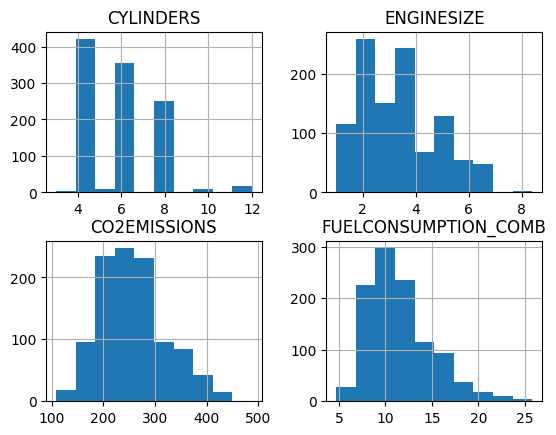

In [26]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

viz.hist()
plt.show()


Plot each of these features against the Emission; to see how linear their relationship it

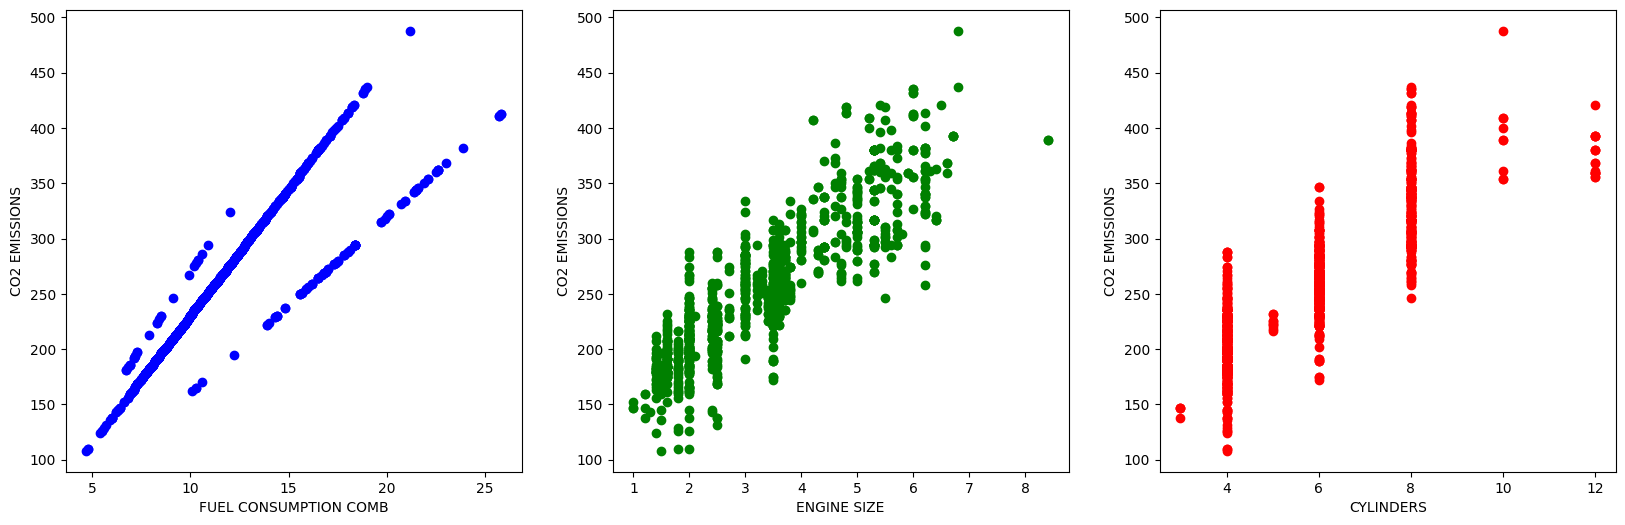

In [27]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION COMB')
plt.ylabel('CO2 EMISSIONS')

plt.subplot(1, 3, 2)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')

plt.subplot(1, 3, 3)
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')

plt.show()


Split data to Train and Test

(Same by `train_test_split()` function in sklearn module)

In [28]:
mask = np.random.rand(len(df)) < 0.8
mask[:-10]

train = cdf[mask]
test = cdf[~mask]  # ~ : symbol of Not; for pandas module


Train and Test length is changed in every run of above code

In [29]:
print('df shape:', df.shape)
print('cdf shape:', cdf.shape)

print()

print('Train shape:', train.shape)
print('test shape:', test.shape)

print()

print(f'Train Ration: {len(train) / len(cdf):.2f}')
print(f'Test Ration: {len(test) / len(cdf):.2f}')


df shape: (1067, 13)
cdf shape: (1067, 4)

Train shape: (861, 4)
test shape: (206, 4)

Train Ration: 0.81
Test Ration: 0.19


In [30]:
train


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [31]:
test


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
10,2.4,4,9.8,225
14,4.7,8,14.7,338
18,5.9,12,15.6,359
29,3.0,6,8.3,224
30,3.0,6,11.2,258
...,...,...,...,...
1042,1.4,4,5.4,124
1044,1.8,4,8.6,198
1048,2.0,4,7.1,192
1049,2.0,4,6.8,184


Simple Regression Model

Work with `ENGINESIZE` data for predict `CO2 EMISSIONS`

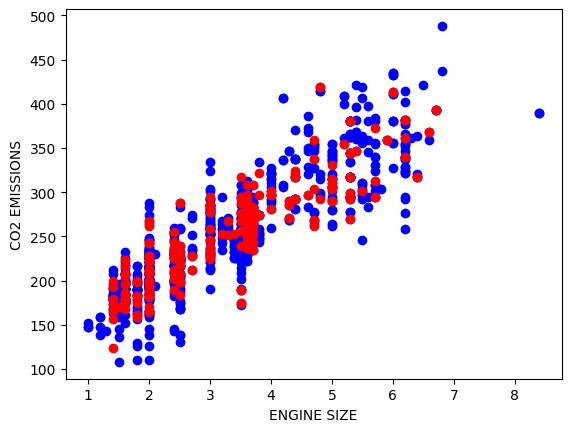

In [32]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')

plt.show()


Change type of data for calculate by `sklearn`

In [33]:
print(type(train['ENGINESIZE']))
print(type(np.asarray(train['ENGINESIZE'])))
print(type(np.asanyarray(train['ENGINESIZE'])))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Calculation of parameters for the **prediction** of `CO2 EMISSIONS` by `ENGINE SIZE`

In [34]:
regr_model = linear_model.LinearRegression()

x_train = np.asanyarray(train[['ENGINESIZE']])  # X_ENGINESIZE_train
y_train = np.asanyarray(train[['CO2EMISSIONS']])  # y_CO2EMISSIONS_train

regr_model.fit(x_train, y_train)  # Fit Model

print('Coefficients:', regr_model.coef_)
print('Intercept:', regr_model.intercept_)


Coefficients: [[39.3202466]]
Intercept: [125.04957107]


In [35]:
print('x train shape:', x_train.shape)
print('y train shape', y_train.shape)


x train shape: (861, 1)
y train shape (861, 1)


$$ \hat{y_i} = \theta_0 + \theta_1 x_i $$

Plot output

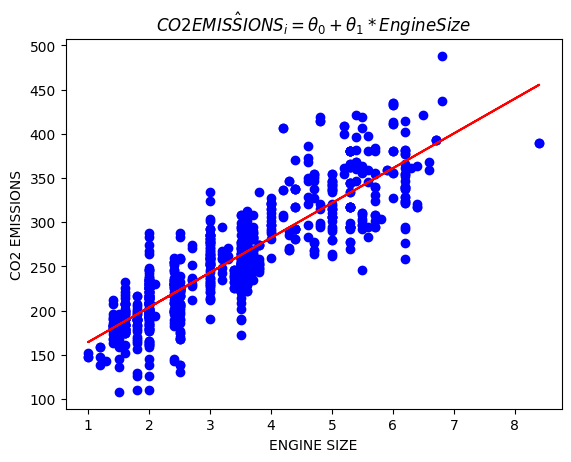

In [36]:
model_line = regr_model.intercept_[
    0] + regr_model.coef_[0][0]*x_train  # prediction model

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')  # Full data
plt.plot(x_train, model_line, '-r')  # prediction line

plt.title('$\hat{CO2 EMISSIONS_i} = \\theta_0 + \\theta_1 * EngineSize$')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()


Start work with `test` data

Calculate $ \hat{y_i} $

In [37]:
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

y_test_predicted = regr_model.predict(x_test)  # y_i hat


In [38]:
print('x test shape:', x_test.shape)
print('y test shape', y_test.shape)
print('y test predicted shpe:', y_test_predicted.shape)


x test shape: (206, 1)
y test shape (206, 1)
y test predicted shpe: (206, 1)


Calculate `MAE`, `MSE` and `R2 Score`

$ \text{MAE} = \frac{1}{n} \sum_{i=0}^{n} |y_i - \hat{y}_i| $

$ \text{MSE} = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2 $

<br>

$ SS_{residual} = \sum_{i=0}^{n} (y_i - \hat{y}_i)^2 $

$ SS_{total} \sum_{i=0}^{n} (y_i - \bar{y})^2 $

$ R^2 = 1 - \frac{SS_{residual}}{SS_{total}} $

In [39]:
MAE = np.mean(np.absolute(y_test_predicted - y_test))
MSE = np.mean((y_test_predicted - y_test) ** 2)
R2Score = r2_score(y_test, y_test_predicted)


print(f'MAE: {MAE:.3f}')  # Mean Absolute Error
print(f'MSE: {MSE:.3f}')  # Mean Square Error
print(f'R2 Score: {R2Score:.3f}')


MAE: 21.109
MSE: 773.293
R2 Score: 0.770


Inner model `Score` and `R2Score` in metrics module in sklearn

In [40]:
print(regr_model.score(x_test, y_test))  # Same by R2 Score
print(R2Score)

print(regr_model.score(x_test, y_test) == R2Score)


0.7695837425252836
0.7695837425252836
True


### <a id='toc1_2_5_'></a>[Lesson 12: Multipe Linear Regression](#toc0_)

Select some features that we want to use for regression

In [132]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
          'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Plot `Emission` values with respect to `Engine Size`

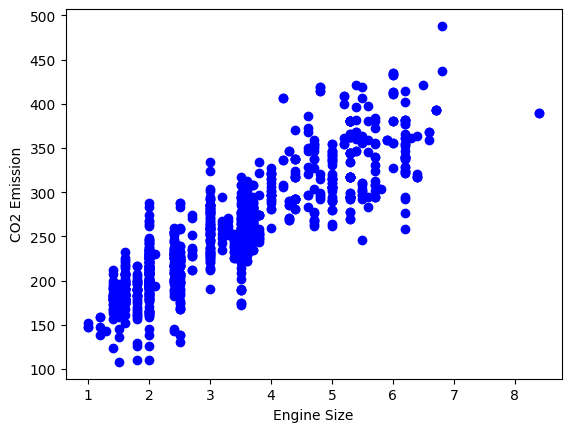

In [133]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')

plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()


Split data to *Train* and *Test*

In [134]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]


In [135]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)


Train shape: (859, 6)
Test shape: (208, 6)


Plot Train data

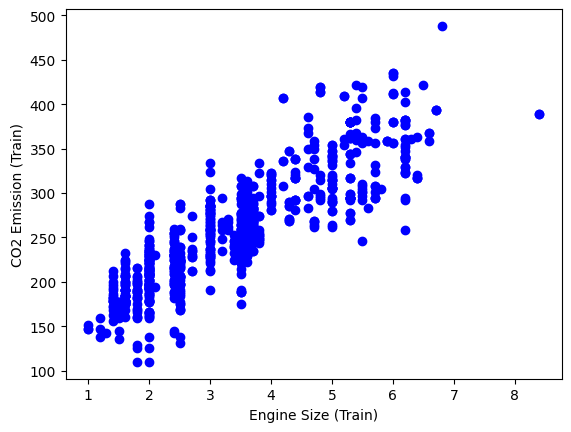

In [136]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

plt.xlabel('Engine Size (Train)')
plt.ylabel('CO2 Emission (Train)')
plt.show()


Multple Linear Regression Model

$$
 y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots 
$$

In [155]:
regr_model = linear_model.LinearRegression()

x_train = np.asanyarray(
    train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

regr_model.fit(x_train, y_train)

print('Coefficients:', regr_model.coef_)
print('Intercept:', regr_model.intercept_)


Coefficients: [[10.4432218   7.56485334  9.62327486]]
Intercept: [66.14011283]


Start work with `test` data

Split `testData` to `x_test` and `y_test`

In [138]:
x_test = np.asanyarray(
    test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


Prediction ( Calculate $\hat{y_i}$ )

In [139]:
y_test_predicted = regr_model.predict(x_test)  # y_i hat


Calculate `MSE` and `R2 Score`

In [140]:
MSE = np.mean((y_test_predicted - y_test) ** 2)
R2Score = r2_score(y_test, y_test_predicted)

print(f'MSE: {MSE:.3f}')
print(f'R2 Score: {R2Score:.3f}')


MSE: 470.543
R2 Score: 0.890


Compare inner model `Score` and `R2Score` in metrics module in sklearn

In [141]:
regr_model.score(x_test, y_test) == R2Score


True

---

**Note:** Work with other module

- model 1: `sklearn`
- model 2: `statsmodels`

`sklearn` module

In [357]:
model1 = linear_model.LinearRegression()

x = np.array([1, 10, 60, 4.2, 2, 33]).reshape(-1, 1)
y = np.array([10, 1, 30.6, 44, 3, 13])

model1.fit(x, y)
y_hat = model1.predict(x)
R2Score1 = r2_score(y, y_hat)

print('Coefficients:', model1.coef_[0])
print('Intercept:', model1.intercept_)
print('R2 Score:', R2Score1)


Coefficients: 0.21873273625177872
Intercept: 12.915942077508998
R2 Score: 0.09320598920546119


**Other Way** 

Work with `Stats Models` module

(_more results_ and Similar by _R language result_)

In [373]:
import statsmodels.api as sm

x = np.array([1, 10, 60, 4.2, 2, 33])
y = np.array([10, 1, 30.6, 44, 3, 13])

x1 = sm.add_constant(x)  # Add a column of ones to an array (Necessary).
ols = sm.OLS(y, x1)  # OLS: Ordinary Least Squares method.
model2 = ols.fit()


Summary of results

In [374]:
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.133
Method:                 Least Squares   F-statistic:                    0.4111
Date:                Sun, 26 Mar 2023   Prob (F-statistic):              0.556
Time:                        17:39:05   Log-Likelihood:                -24.643
No. Observations:                   6   AIC:                             53.29
Df Residuals:                       4   BIC:                             52.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9159      9.660      1.337      0.2

c:\Users\ArminaRayaneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Other Summary of results

In [375]:
print(model2.summary2())


                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.133 
Dependent Variable: y                AIC:                53.2862
Date:               2023-03-26 17:39 BIC:                52.8697
No. Observations:   6                Log-Likelihood:     -24.643
Df Model:           1                F-statistic:        0.4111 
Df Residuals:       4                Prob (F-statistic): 0.556  
R-squared:          0.093            Scale:              324.39 
------------------------------------------------------------------
          Coef.    Std.Err.     t      P>|t|     [0.025     0.975]
------------------------------------------------------------------
const    12.9159     9.6602   1.3370   0.2522   -13.9051   39.7370
x1        0.2187     0.3411   0.6412   0.5563    -0.7284    1.1659
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          2.140
Prob(Omnibus):         nan      

c:\Users\ArminaRayaneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Get inner values

In [376]:
p_value = model2.pvalues
R2Score2 = model2.rsquared
Residuals = model2.resid

print('P Value:', p_value)
print('R2 Score:', R2Score2)
print('Residuals:', Residuals)


P Value: [0.25218692 0.55628289]
R2 Score: 0.09320598920546119
Residuals: [ -3.13467481 -14.10326944   4.56009375  30.16538043 -10.35340755
  -7.13412237]


---

### <a id='toc1_2_6_'></a>[Lesson 14: Polynomial Regression](#toc0_)

In [495]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plot `ENGINE SIZE` vs `CO2 EMISSIONS` data

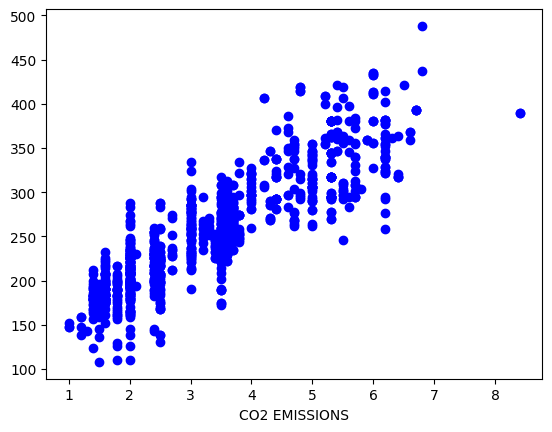

In [496]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')

plt.xlabel('ENGINE SIZE')
plt.xlabel('CO2 EMISSIONS')
plt.show()


Split data to `Train` and `Test`

In [497]:
mask = np.random.rand(len(df)) < 0.8

train = cdf[mask]
test = cdf[~mask]


In [498]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)


Train shape: (852, 4)
Test shape: (215, 4)


In [499]:
#  Train data
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

#  Test data
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


In [500]:
print('X_Train shape:', x_train.shape)
print('Y_Train shape:', y_train.shape)
print()
print('X_Test shape:', x_test.shape)
print('Y_Test shape:', y_test.shape)


X_Train shape: (852, 1)
Y_Train shape: (852, 1)

X_Test shape: (215, 1)
Y_Test shape: (215, 1)


In [501]:
print(x_train[:5])


[[2. ]
 [2.4]
 [1.5]
 [3.5]
 [3.5]]


$$ (x Train Poly)_j  =  (x Train)_j^i $$

$$ i = 0,1,2, ... ,degree$$

$$ j = 1,2,..., length(data \; row) $$

$$ ( X_1,\; X_2,\; X_3 ) \longleftarrow  ( X^0,\; X^1,\; X^2 )  $$

In [502]:
degree = 2  # from 0 to 2 degree
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)  # Or poly.transform(x_train)

print(x_train_poly[:5])


[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]]


In [503]:
regr_model = linear_model.LinearRegression()

regr_model.fit(x_train_poly, y_train)


coefs = regr_model.coef_
intercept = regr_model.intercept_

print('Coefficients:', coefs)
print('Intercept:', intercept)


Coefficients: [[ 0.         46.67676191 -1.01379054]]
Intercept: [113.4489805]


Ploting

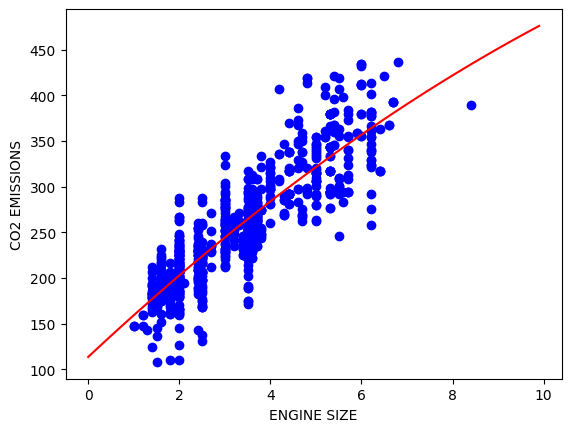

In [504]:
x_sequence = np.arange(0.0, 10.0, 0.1)
model_line = intercept[0] + coefs[0][0]*x_sequence + \
    coefs[0][1]*x_sequence + coefs[0][2]*np.power(x_sequence, 2)


plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(x_sequence, model_line, 'r')

plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()


`Model Evaluation` and work with `Test data`

In [505]:
x_test_poly = poly.fit_transform(x_test)

y_test_predicted = regr_model.predict(x_test_poly)  # Prediction


In [506]:
MSE = np.mean((y_test_predicted - y_test) ** 2)
R2Score = r2_score(y_test, y_test_predicted)

print(f'MSE: {MSE:0.3f}')
print(f'R2 Score: {R2Score:0.3f}')


MSE: 1001.869
R2 Score: 0.773


### <a id='toc1_2_7_'></a>[Lesson 15: Non Linear Regression Analysis](#toc0_)

**Note:** _See this lesson notebook_

## <a id='toc1_3_'></a>[03 - Classification](#toc0_)

### <a id='toc1_3_1_'></a>[Lesson 05: KNN (K-Nearest Neighbors)](#toc0_)

In [222]:
df = pd.read_csv('teleCust1000t.csv')

print('df shape:', df.shape)
df.head()


df shape: (1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Data Visualization and Analysis

See how many of each clas is in our data set

`custcat` : Customer Category ( _y label_ )

In [223]:
df['custcat'].value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

We can easilly explore our data using visualization techniques:

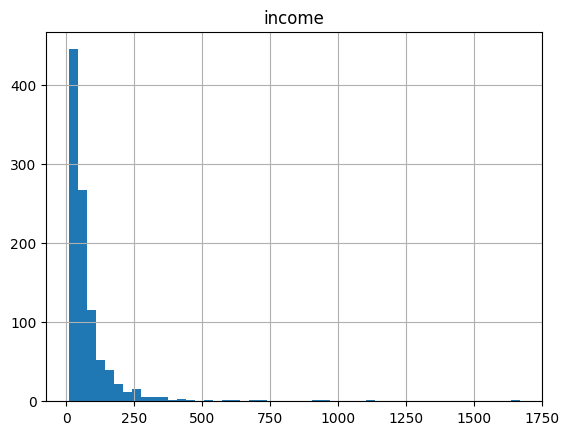

In [224]:
df.hist(column='income', bins=50)
plt.show()


Feature set

define feature sets, _X_:

In [225]:
df.columns


Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

**Note:** To use scikit-learn, we have to convert the Pandas data frame to a Numpy array:

`X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values`

Or

In [226]:
X = df.iloc[:, :-1].values  # astype(float)

X[:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Labels

In [227]:
y = df['custcat'].values

y[:5]


array([1, 4, 3, 1, 3], dtype=int64)

**Normalize Data:** Data Standardiation given the data _zero mean_ and _unit variance_, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

$$ Z_i = \frac{X_i - \mu}{\sigma} $$

In [397]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X.astype(float))  # astype(float) is for Numpy

print(X_scaled[0:5])


[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [398]:
print('Each columns Mean:\n', X_scaled.mean(axis=0))
print('\nEach columns STD:\n', X_scaled.std(axis=0))


Each columns Mean:
 [ 2.16715534e-16 -1.61648472e-16  1.98951966e-16 -2.66453526e-18
 -2.66453526e-17  4.08562073e-17  1.70530257e-16 -2.84217094e-17
 -8.79296636e-17  2.13162821e-17  2.66453526e-17]

Each columns STD:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Train test Split

In [399]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=4)


In [400]:
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)


Train set shape: (800, 11) (800,)
Test set shape: (200, 11) (200,)


Classification

K Nearest Neighbir (KNN)

import library:

`from sklearn.neighbors import KNeighborsClassifier`

Training

Start the algorithm with `k=4` for now:

In [401]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

neigh


KNeighborsClassifier(n_neighbors=4)

**Note:** $$ \text{fit} == \text{learning} $$

Predicting

We can use the model to make predictions on the _test_ data set:

In [402]:
y_hat = neigh.predict(X_test)

y_hat[0:5]


array([1, 1, 3, 2, 4], dtype=int64)

Accuracy evaluation

In [403]:
train_acc = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_acc = metrics.accuracy_score(y_test, y_hat)

print('Train set Accuracy: ', train_acc)
print('Test set Accuracy: ', test_acc)

# print('Inner Score Accuracy: ', neigh.score(X_test, y_test))


Train set Accuracy:  0.5475
Test set Accuracy:  0.32


For `k=6`;

(work with _inner Accuracy score function_):

In [404]:
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

print('Train set Accuracy: ', neigh.score(X_train, y_train))
print('Test set Accuracy: ', neigh.score(X_test, y_test))


Train set Accuracy:  0.51625
Test set Accuracy:  0.31


We can calculate the accuracy of KNN for different value of _k_.

In [405]:
Ks = 10
train_accs = np.zeros(Ks)  # train Accuracys
test_accs = np.zeros(Ks)  # test Accuracys

for k in range(1, Ks+1):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_accs[k-1] = neigh.score(X_train, y_train)
    test_accs[k-1] = neigh.score(X_test, y_test)


print('Train Accuracys:', train_accs)
print('\nTest Accuracys:', test_accs)


Train Accuracys: [1.      0.6175  0.56875 0.5475  0.5375  0.51625 0.5125  0.4925  0.5025
 0.4875 ]

Test Accuracys: [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34  0.33 ]


Plot the model accuracy for a different number of neighbors

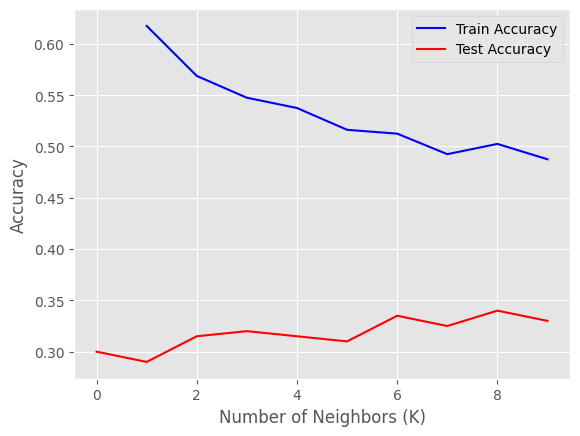

In [406]:
with plt.style.context('ggplot'):

    plt.plot(range(len(train_accs))[
             1:], train_accs[1:], color='blue', label='Train Accuracy')
    plt.plot(range(len(test_accs)), test_accs,
             color='red', label='Test Accuracy')

    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()


In [407]:
print(
    f'The best Test Accuracy was with {test_accs.max()} with k={test_accs.argmax()}')


The best Test Accuracy was with 0.34 with k=8


---

New Observation

In [425]:
new_X = [[2, 15, 44, 2, 9, 1500, 4, 9, 0, 0, 6],
         [4, 5, 57, 3, 5, 300, 4, 5, 1, 0, 1]]   # Two new Observation

# Scaling new Obs. with fitted parameters of the model (model == Train data set)
new_X_scaled = scaler.transform(new_X)

new_y_hat = neigh.predict(new_X_scaled)  # Predicting the new observations


print(f'The Class of new observations is: {new_y_hat}')


The Class of new observations is: [4 3]


---

### <a id='toc1_3_2_'></a>[Lesson 09: Decision Trees](#toc0_)

In [3]:
df = pd.read_csv('drug200.csv', delimiter=',')

print('Data shape:', df.shape)
df.head()


Data shape: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


PreProcessing

- `X` is the _Feature Matrix_
- `y` is the _response vectore_

In [4]:
X = df.iloc[:, :-1].values
y = df['Drug'].values

print(X[:5])
print(y[:5])


[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
['drugY' 'drugC' 'drugC' 'drugX' 'drugY']


Label frequency:

In [5]:
df['Drug'].value_counts()


drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

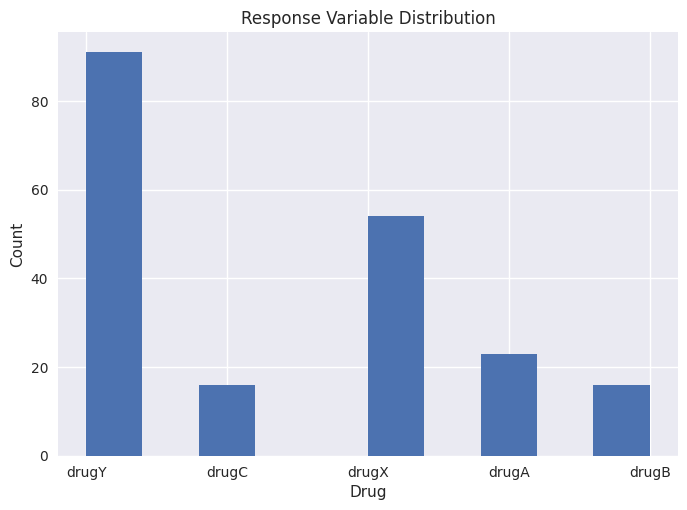

In [6]:
with plt.style.context('seaborn'):
    df['Drug'].hist()

    plt.title('Response Variable Distribution')
    plt.xlabel('Drug')
    plt.ylabel('Count')

plt.show()


Numericaling Factorical value (Labaling) `Sex`, `BP`, `Cholesterol`:

In [7]:
print('Age:', np.unique(X[:, 1]))
print('BP:', np.unique(X[:, 2]))
print('Cholesterol:', np.unique(X[:, 3]))


Age: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']


**Note:** The code below should be applied to the data only **once**

it gives an _error_ for the next time

In [8]:
le_sex = preprocessing.LabelEncoder().fit(['F', 'M'])  # label Sex
X[:, 1] = le_sex.transform(X[:, 1])

le_BP = preprocessing.LabelEncoder().fit(['HIGH', 'LOW', 'NORMAL'])  # label BP
X[:, 2] = le_BP.transform(X[:, 2])

le_Chol = preprocessing.LabelEncoder().fit(
    ['HIGH', 'NORMAL'])  # label Cholesterol
X[:, 3] = le_Chol.transform(X[:, 3])


Primary X data:

In [9]:
df.iloc[:, :-1].head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


Transformed X data:

In [10]:
X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Setting up the _Decision Tree_

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3)


In [12]:
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)


Train set shape: (140, 5) (140,)
Test set shape: (60, 5) (60,)


Modeling:

In [13]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree


DecisionTreeClassifier(criterion='entropy', max_depth=4)

_Fit_ the data with the Training feature matrix `X_train` and training response vector `y_train`

In [14]:
drugTree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [15]:
y_hat = drugTree.predict(X_test)  # predTree


In [16]:
print('y_hat:', y_hat[:5])
print('y_test:', y_test[:5])


y_hat: ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
y_test: ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


Evaluation

In [17]:
accScoreTree = metrics.accuracy_score(y_test, y_hat)
accScoreInnerTree = drugTree.score(X_test, y_test)

print("DecisionTrees's Accuracy:", accScoreTree)
print("DecisionTrees's Accuracy (Inner function):", accScoreInnerTree)


DecisionTrees's Accuracy: 0.9833333333333333
DecisionTrees's Accuracy (Inner function): 0.9833333333333333


Visualization

visualization the Tree

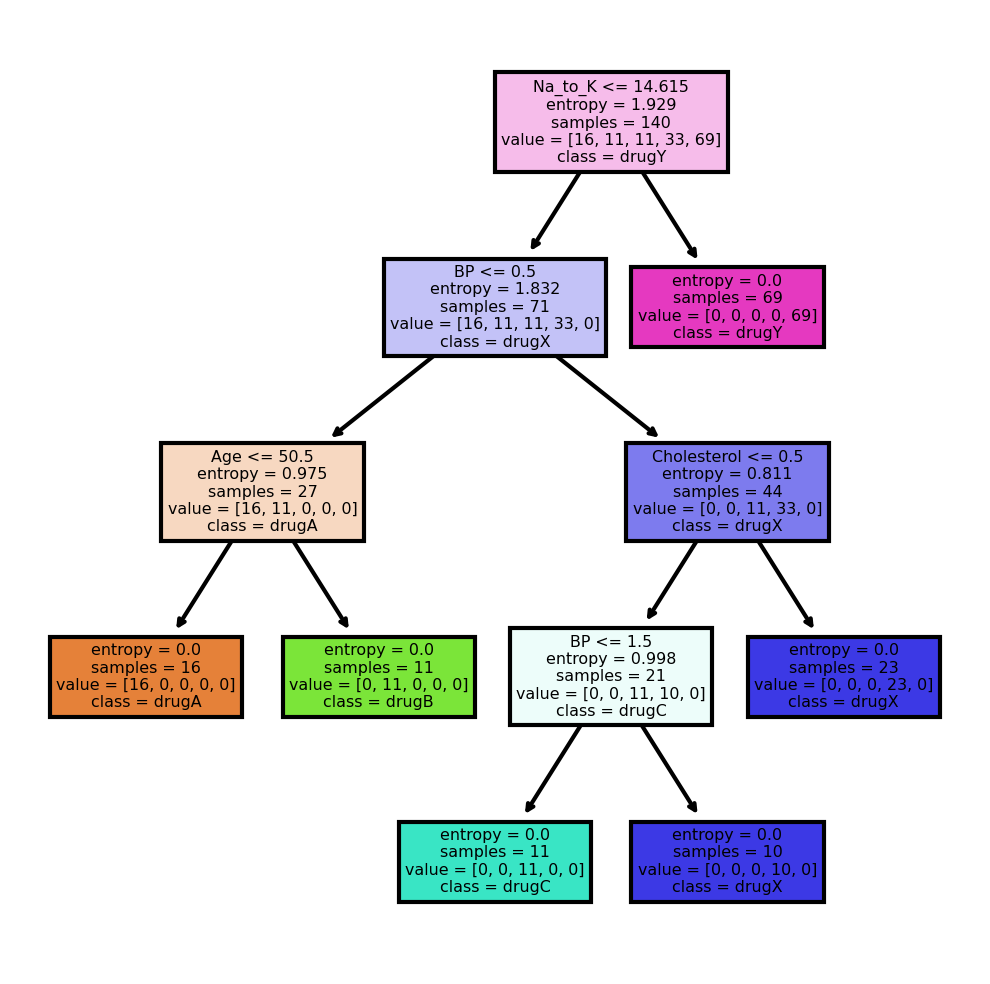

In [62]:
featureNames = df.columns[0:5]
classNames = np.unique(y_train)

plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)  # plot's base Options

tree.plot_tree(drugTree, feature_names=featureNames,
               class_names=classNames, filled=True)  # Draw Tree Plot

plt.show()


### <a id='toc1_3_3_'></a>[Lesson 14: Logistic Regression](#toc0_)

**Note:** in _Logistic Regression_, `Y` is a _Categorical value_ and **All** `X`s should be _Continues_ or converted to _Continues_.

Load Data from CSV file

In [6]:
df = pd.read_csv('ChurnData.csv')

print('Data shape:', df.shape)
df.head()


Data shape: (200, 28)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


Data Preprocessing and Selection

In [8]:
df.churn.dtype


dtype('float64')

In [9]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
         'callcard', 'wireless', 'churn']]  # Select needed features
# change Response variable type from float to int
df['churn'] = df['churn'].astype('int')

print(df.shape)
df.head()


(200, 10)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [10]:
df['churn'].value_counts()


0    142
1     58
Name: churn, dtype: int64

Define `X`, and `y`:

(for work with _sklearn_, data should be transform from _pandas_ to _numpy_ )

In [11]:
# # Select needed features and Transform to Numpy
X = np.asarray(
    df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

X[:5]


array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [12]:
y = np.asarray(df['churn'])

y[:5]


array([1, 1, 0, 0, 0])

Normalize the dataset:

$$
    Z_i = \frac{X_i - \mu}{\sigma}
$$

**Note:** A good practice is to write the fit and transform functions _separately_.

In [13]:
scaler = preprocessing.StandardScaler().fit(
    X)  # (1) frist Learn TrainData's parameters
X = scaler.transform(X)  # (2) and so do Transform into data.

X[:5]


array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Train / Test dataset:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)


print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)


Train shape: (160, 7) (160,)
Test shape: (40, 7) (40,)


Modeling (Logistic Regression):

In [15]:
from sklearn.linear_model import LogisticRegression


In [16]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

LR


LogisticRegression(C=0.01, solver='liblinear')

in above code, `C` parameter is _inverse of regularization strength_.

Predict:

In [22]:
y_hat = LR.predict(X_test)

y_hat[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

`predict_proba` returns estimates for all classes (Sum of evey row is 1):

In [21]:
y_hat_prob = LR.predict_proba(X_test)

y_hat_prob[:10]


array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ]])

Evaluation:

Try the `Jaccard index` for accuracy evaluation:

In [30]:
from sklearn.metrics import jaccard_score


$$
    \text{P}(y=0 | X)
$$

In [41]:
jaccard_score(y_test, y_hat, pos_label=0)


0.7058823529411765

$$
    \text{P}(y=1 | X)
$$

In [42]:
jaccard_score(y_test, y_hat, pos_label=1)


0.375

Inner Score function: Return the _mean accuracy_ on the given test data and labels:

In [38]:
LR.score(X_test, y_test)


0.75

Confusion Matrix:

Another way of looking at the _Accuracy_ of the classifier is to look at _Confusion Matrix_.

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of _Observations known_ to be in group $i$ and _Predicted_ to be in group $j$.  
in Confusion Matrix, thus in binary classification, the count of:
- True Negatives : $C_{0,0}$
- False Negatives : $C_{1,0}$
- True Positives : $C_{1,1}$
- False Positives : $C_{0,1}$

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


Compute confusion matrix:

In [164]:
cnf_matrix = confusion_matrix(y_test, y_hat)
tn, fp, fn, tp = cnf_matrix.ravel()


Separation of Confusion Matrix values:

In [165]:
tn, fp, fn, tp = cnf_matrix.ravel()

print(cnf_matrix)
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp)


[[24  1]
 [ 9  6]]
TN: 24
FP: 1
FN: 9
TP: 6


Plot heatmap for Confusion Matrix:

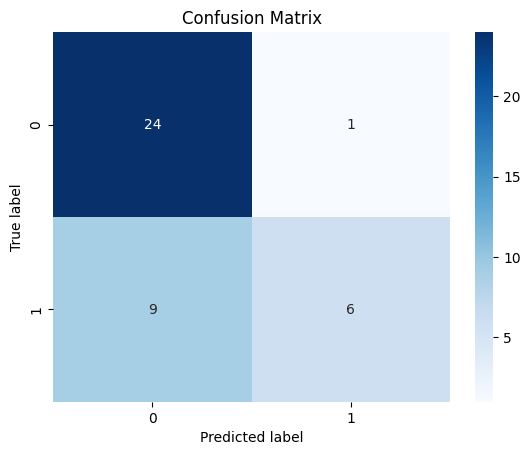

In [166]:
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Blues, fmt='d', cbar=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Classification report summary:

- _Precision_ is a measure of the _Accuracy_ provided that a class label has been predicted:  **_Precision_** $= \frac{TP}{TP + FP}$

- _Recall_ is the _true positive rate_:  **_Recall_** $= \frac{TP}{TP + FN}$

- **_f1-score_** $= 2\frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2TP}{2TP + FP + FN}$

- **_Accuracy_** $= \frac{TP + TN}{TP + FP + FN + TN}$

In [210]:
from sklearn.metrics import classification_report


In [169]:
print(classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



---

Log Loss

Now, try _log loss_ for evaluation:

In [170]:
from sklearn.metrics import log_loss


In [171]:
log_loss(y_test, y_hat_prob)


0.6017092478101185

### <a id='toc1_3_4_'></a>[Lesson 13: SVM (Support Vector Machines)](#toc0_)

in SVM, we mapping data to high-dimensional so a hyperplane separator can be drawn.

Lots of real world datas are Linearly non separable, but we use SVM for solve it.

Load Data from CSV file:

In [187]:
df = pd.read_csv('cell_samples.csv')

print(df.shape)
df.head()


(699, 11)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Response Variable freq:

In [188]:
df['Class'].value_counts()


2    458
4    241
Name: Class, dtype: int64

Plot a slice of data:

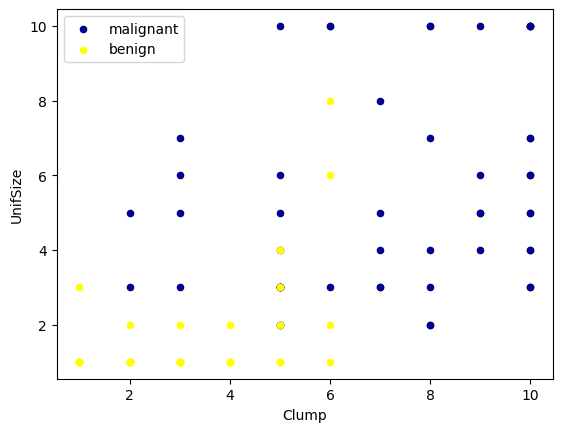

In [189]:
# this ploting method is in Pandas.
ax = df[df['Class'] == 4][0:50].plot(
    kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
df[df['Class'] == 2][0:50].plot(
    kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)

plt.show()


Data Pre-processing and Selection:

first look at Columns data types:

In [190]:
df.dtypes


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

it looks like the `BareNuc` column includes some valuews that are not numerical

In [191]:
df['BareNuc'].value_counts()


1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

`BareNuc` have a `?` symbole. We can drop those rows:

In [196]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [197]:
df['BareNuc'].value_counts()


1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [200]:
feature_df = feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh',
                              'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]  # Select needed columns.
X = np.asarray(feature_df)  # pandas to numpy

X[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [201]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])

y[0:5]


array([2, 2, 2, 2, 2])

Train / Test dataset:

In [202]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)


Train: (546, 9) (546,)
Test: (137, 9) (137,)


Modeling:

In [203]:
from sklearn import svm


Kernel functions:
- Linear
- Ploynomial
- Radial Basis Function (RBF)
- Sigmoid

In [204]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)


SVC()

Predict:

In [205]:
y_hat = svm_model.predict(X_test)

y_hat[:5]


array([2, 4, 2, 4, 2])

Real `X_test` label:

In [206]:
y_test[:5]


array([2, 4, 2, 4, 2])

Evaluation:

In [208]:
svm_model.score(X_test, y_test)  # Inner score function


0.9635036496350365

In [218]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, average='weighted')


0.9639038982104676

In [211]:
from sklearn.metrics import classification_report, confusion_matrix


In [212]:
cnf_matrix = confusion_matrix(y_test, y_hat)


In [213]:
cnf_matrix = confusion_matrix(y_test, y_hat)
tn, fp, fn, tp = cnf_matrix.ravel()


In [214]:
tn, fp, fn, tp = cnf_matrix.ravel()

print(cnf_matrix)
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp)


[[85  5]
 [ 0 47]]
TN: 85
FP: 5
FN: 0
TP: 47


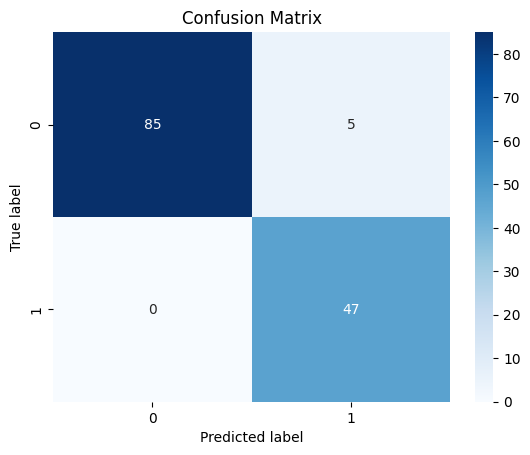

In [215]:
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Blues, fmt='d', cbar=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [217]:
print(classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Try the Jaccard index for accuracy:

In [219]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_hat, pos_label=2)


0.9444444444444444

## <a id='toc1_4_'></a>[04 - Clustering](#toc0_)

Different that classification:
- No need to be labeled.
- Prediction is not the goal.

### <a id='toc1_4_1_'></a>[Lesson 05: K-Means](#toc0_)

On this lesson: K-Means on a _Randomly generated dataset:_

In [92]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [134]:
centers = [[4, 4], [-2, -1], [2, -3], [1, 1]]

X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=centers,
                  cluster_std=0.9,
                  random_state=0)


In [135]:
print(X.shape)
print(X[:10])


(5000, 2)
[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 [-1.44019058 -1.36678252]
 [ 4.90119792  4.53749125]
 [ 2.54992151 -3.41705233]
 [ 1.90268222 -3.80481317]
 [ 2.53632101  1.32359471]
 [ 5.44766994  3.49457913]
 [ 1.29121859  1.12702441]]


In [136]:
print(y.shape)
print(y[:10])


(5000,)
[1 2 2 1 0 2 2 3 0 3]


In [137]:
np.unique(y, return_counts=True)


(array([0, 1, 2, 3]), array([1250, 1250, 1250, 1250], dtype=int64))

Scatter plot:

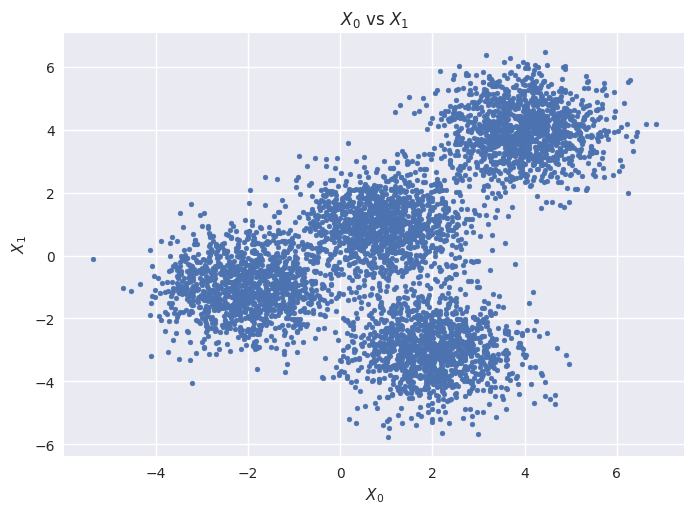

In [138]:
with plt.style.context('seaborn'):
    plt.scatter(X[:, 0], X[:, 1], marker='.')

    plt.title('$X_0$ vs $X_1$')
    plt.xlabel('$X_0$')
    plt.ylabel('$X_1$')

plt.show()


Setting up K-Means

In [139]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)


In [140]:
k_means.fit(X)


KMeans(n_clusters=4, n_init=12)

Grab the _labels_ for each point in the model:

In [141]:
k_means_labels = k_means.labels_

print(k_means_labels.shape)
print(k_means_labels[:10])


(5000,)
[2 0 0 2 3 0 0 1 3 1]


Get the _coordinates_ of the cluster centers:

In [142]:
k_means_cluster_centers = k_means.cluster_centers_

print(k_means_cluster_centers.shape)
print(k_means_cluster_centers)


(4, 2)
[[ 1.99741008 -3.01666822]
 [ 0.96900523  0.98370298]
 [-2.03743147 -0.99782524]
 [ 3.97334234  3.98758687]]


Plot:

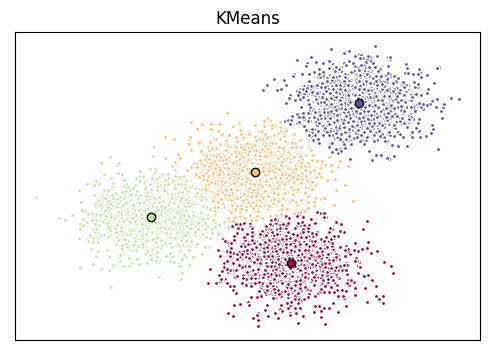

In [145]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1],
            'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o',
            markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


Now, try to cluster the above dataset into 3 clusters:


In [147]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means.fit(X)

k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

print(k_means_labels[:10])
print(k_means_cluster_centers)


[0 1 1 0 2 1 1 2 2 0]
[[-0.80573618 -0.16981512]
 [ 2.02030226 -2.94614399]
 [ 3.70423656  3.6980925 ]]


Plot:

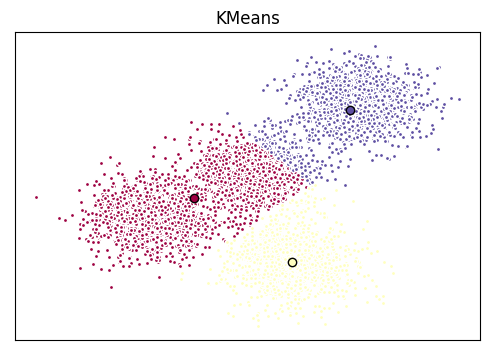

In [149]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_labels)), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1],
            'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o',
            markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


### <a id='toc1_4_2_'></a>[Lesson 06: K-Means](#toc0_)

On this lesson: K-Means for _Customer segmentation:_

In [5]:
df = pd.read_csv('Cust_Segmentation.csv')

print(df.shape)
df.head()


(850, 10)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


Pre-processing:

In [6]:
df = df.drop('Address', axis=1)

print(df.shape)
df.head()


(850, 9)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


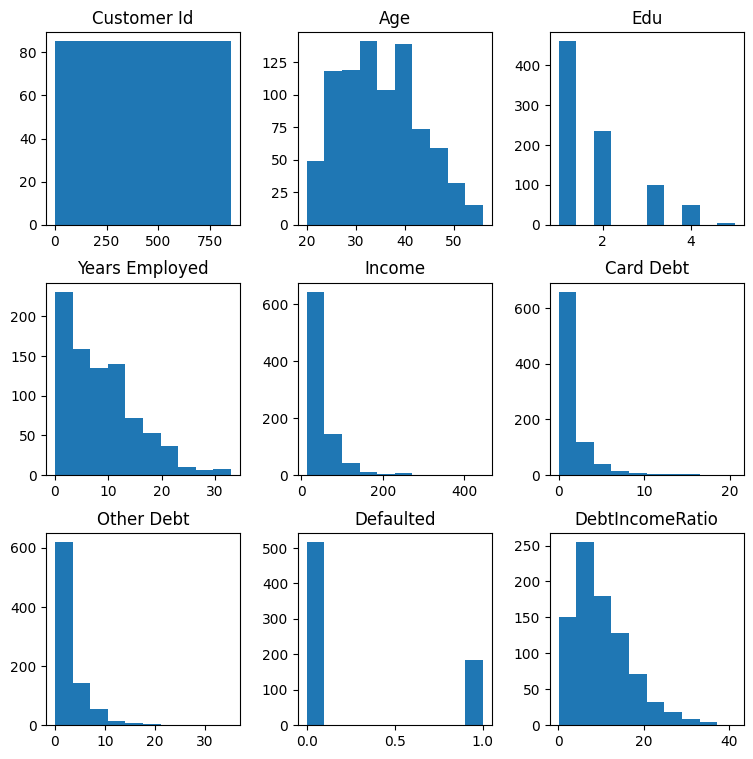

In [7]:
df.hist(figsize=(9, 9), grid=False)
plt.show()


Normalize:

In [272]:
X = df.values[:, 1:]  # Drop Customer ID
X = np.nan_to_num(X)

Clus_dataSet = preprocessing.StandardScaler().fit(X)
Clus_dataSet = Clus_dataSet.transform(X)

print(Clus_dataSet.shape)
Clus_dataSet[:5]


(850, 9)


array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509, -0.5485468 ],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677,  1.8799156 ],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385, -0.5485468 ],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509, -0.5485468 ],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653,  0.6656844 ]])

_Normality Test_ on one feature:

,W,pval,normal
0,0.975655,1.042495e-10,False


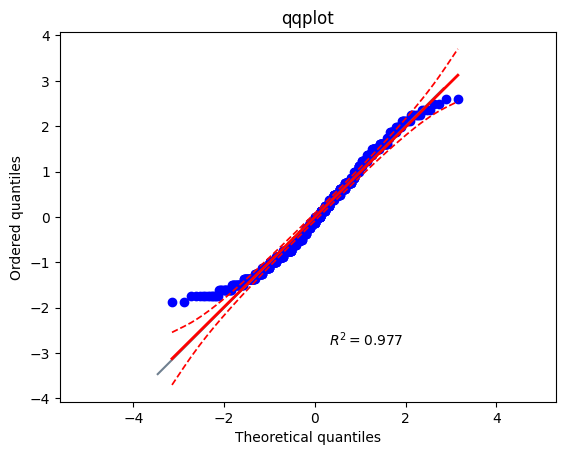

In [9]:
import pingouin as pg

feature = 0  # Column
pg.qqplot(Clus_dataSet[:, feature], dist='norm')
plt.title('qqplot')
plt.axis('equal')

pg.normality(Clus_dataSet[:, feature], method='shapiro')


Modeling:

In [10]:
from sklearn.cluster import KMeans


In [11]:
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)

labels = k_means.labels_
print(labels[:10])


[1 0 1 1 2 0 1 0 1 0]


Insights:

Assign the labels to each row in dataFrame:

In [12]:
df.shape


(850, 9)

In [13]:
df['Clus_km'] = labels

print(df.shape)
df.head()


(850, 10)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


Can check the _centroid values_ by Averaging the feature in each cluster:

In [14]:
df.groupby('Clus_km').mean()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


Now look at the Distribution of customers based on their _Age_ and _Income_ and size by _Education_:

C:\Users\DELL\AppData\Local\Temp\ipykernel_5368\4098425967.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float),


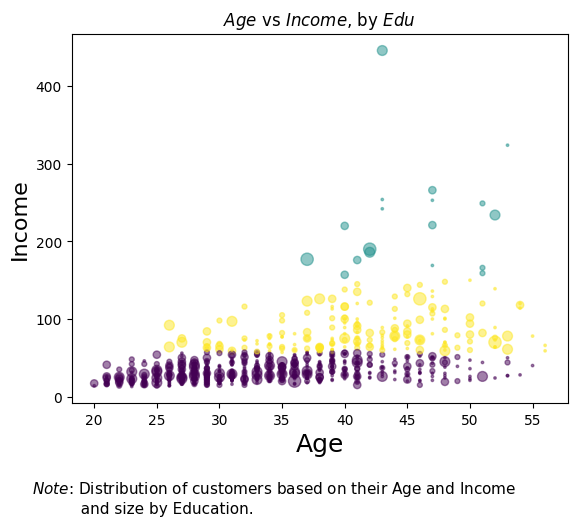

In [273]:
# (circle area: pi*r^2) Education --> Size of each point in scatter plot.
size = np.pi * (X[:, 1]) ** 2

plt.scatter(X[:, 0], X[:, 3],
            s=size,
            c=labels.astype(np.float),
            alpha=0.5)

plt.title('$Age$ vs $Income$, by $Edu$')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.text(15, -150,
         '''$Note$: Distribution of customers based on their Age and Income
          and size by Education.''',
         fontsize=11)
plt.show()


### <a id='toc1_4_3_'></a>[Lesson 10: Hierarchial Clustering - Agglomerative](#toc0_)

On this lesson: work on a _Randomly generated dataset:_

In [290]:
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

Generating Random Data:

In [292]:
X1, y1 = make_blobs(n_samples=50,
                    centers=[[4,4],[-2,-1],[1,1],[10,4]],
                    cluster_std=0.9,
                    random_state=0)

In [295]:
print(X1.shape, y1.shape)
print(X[:5])
print(y[:5])

(50, 2) (50,)
[[4.100e+01 2.000e+00 6.000e+00 1.900e+01 1.240e-01 1.073e+00 0.000e+00
  6.300e+00 0.000e+00]
 [4.700e+01 1.000e+00 2.600e+01 1.000e+02 4.582e+00 8.218e+00 0.000e+00
  1.280e+01 2.000e+00]
 [3.300e+01 2.000e+00 1.000e+01 5.700e+01 6.111e+00 5.802e+00 1.000e+00
  2.090e+01 0.000e+00]
 [2.900e+01 2.000e+00 4.000e+00 1.900e+01 6.810e-01 5.160e-01 0.000e+00
  6.300e+00 0.000e+00]
 [4.700e+01 1.000e+00 3.100e+01 2.530e+02 9.308e+00 8.908e+00 0.000e+00
  7.200e+00 1.000e+00]]
[0.         1.00117786 2.00235571 3.00353357 4.00471143]


Plot:

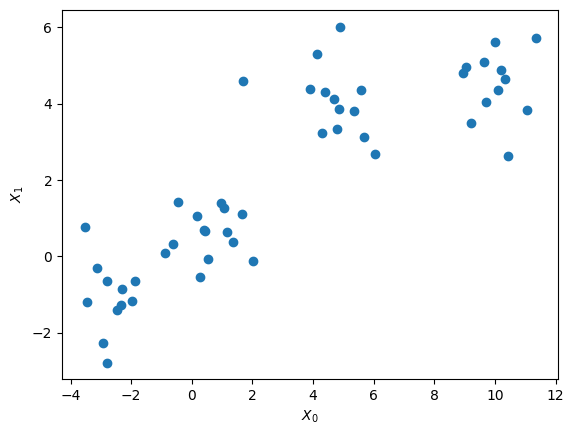

In [302]:
plt.scatter(X1[:, 0], X1[:, 1])

plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.show()

Agglomerative Clustering:

In [304]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom

AgglomerativeClustering(linkage='average', n_clusters=4)

Fit the Model:

In [305]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

Dendrogram Associated for the Agglomerative Hierarchial Clustering:

In [328]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[ 0.         11.72918877  0.74974402 ...  5.55605395  9.56667691
   9.97411768]
 [11.72918877  0.         11.87120722 ...  6.51840668  2.68127839
   1.80800678]
 [ 0.74974402 11.87120722  0.         ...  5.53116661  9.82073205
  10.14929544]
 ...
 [ 5.55605395  6.51840668  5.53116661 ...  0.          4.98882546
   4.94732227]
 [ 9.56667691  2.68127839  9.82073205 ...  4.98882546  0.
   1.14528626]
 [ 9.97411768  1.80800678 10.14929544 ...  4.94732227  1.14528626
   0.        ]]


Using the `linkage` class from hierarchy, pass in the parameters:
- The Distance matrix
- 'Complete' for complete linkage

In [330]:
Z = hierarchy.linkage(dist_matrix, method='complete')

Z[:5]

C:\Users\DELL\AppData\Local\Temp\ipykernel_5368\1969234063.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, method='complete')


array([[ 3.        , 37.        ,  0.19700321,  2.        ],
       [14.        , 18.        ,  0.42566479,  2.        ],
       [ 0.        , 26.        ,  0.83647483,  2.        ],
       [15.        , 31.        ,  0.88240131,  2.        ],
       [32.        , 47.        ,  1.05632248,  2.        ]])

Draw Dendrogram:

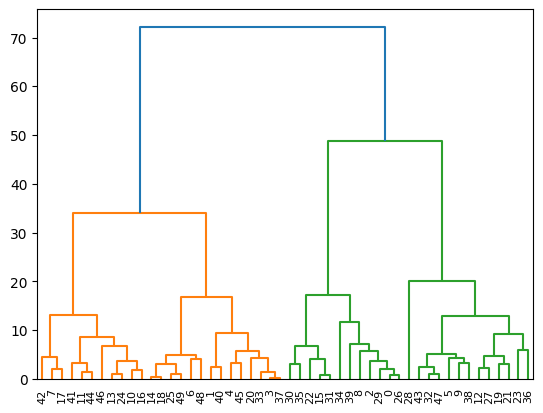

In [341]:
dendro = hierarchy.dendrogram(Z=Z)

### <a id='toc1_4_4_'></a>[Lesson 11: Hierarchial Clustering - Agglomerative](#toc0_)

On this lesson: Work on a _Vehicle dataset:_

Read data:

In [374]:
filename = 'cars_clus.csv'
df = pd.read_csv(filename)

print(df.shape)
df.head()

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Data Cleaning:

In [375]:
df.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

Clean the dataset by _dropping_ the rows that have _Null values:_

In [377]:
df[df.columns[2:14+1]].head(0)  # View for right selected Columns.

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales


In [376]:
print('Shape of dataset Before Cleaning:', df.shape)

Shape of dataset Before Cleaning: (159, 16)


Droping:

In [378]:
df[df.columns[2:14+1]] = df[df.columns[2:14+1]].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

Convert _MPG_ (Miles Per Gallon) to _KML_ (Kilometers per Liter) and add this to new column in data set:

In [382]:
df['kml'] = 236.25 / df['mpg']

In [383]:
print('Shape of dataset After Cleaning:', df.shape)

Shape of dataset After Cleaning: (117, 17)


In [384]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636


In [385]:
df.dtypes

manufact      object
model         object
sales        float64
resale       float64
type         float64
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
kml          float64
dtype: object

Feature selection:

In [386]:
featureSet = df[['engine_s', 'horsepow', 'wheelbas',
                 'width', 'length', 'curb_wgt',
                 'fuel_cap', 'mpg', 'kml']]

Normalization:

Work with _MinMax Scaler_:
Convert scale to 0 and 1

In [387]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [389]:
x = featureSet.values # returns a numpy array
feature_mtx = min_max_scaler.fit_transform(x)

print(feature_mtx.shape)
feature_mtx[:5]

(117, 9)


array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333, 0.30357143],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333, 0.4       ],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333, 0.52272727],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       , 0.33333333],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333, 0.52272727]])

Clustring using _Scipy:_

Calculate the _Distance matrix_ with hand!:

In [392]:
import scipy

leng = feature_mtx.shape[0]
D = np.zeros([leng, leng])

for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i],
                                                   feature_mtx[j])
        
D  # Distance matrix.

array([[0.        , 0.585763  , 0.78573911, ..., 0.28685109, 0.25672507,
        0.19866125],
       [0.585763  , 0.        , 0.25892304, ..., 0.36698373, 0.66436916,
        0.62297526],
       [0.78573911, 0.25892304, 0.        , ..., 0.55085974, 0.83285848,
        0.79502645],
       ...,
       [0.28685109, 0.36698373, 0.55085974, ..., 0.        , 0.41920634,
        0.35863999],
       [0.25672507, 0.66436916, 0.83285848, ..., 0.41920634, 0.        ,
        0.15212198],
       [0.19866125, 0.62297526, 0.79502645, ..., 0.35863999, 0.15212198,
        0.        ]])

In [393]:
import scipy.cluster.hierarchy

Z = hierarchy.linkage(D, 'complete')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5368\195902657.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [394]:
from scipy.cluster.hierarchy import fcluster

max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')

clusters

array([ 1,  5,  5,  8,  5,  4,  7,  5,  5,  5,  5,  5,  4,  4,  5,  8,  7,
        5,  5,  5,  4,  1, 11,  7,  7,  5,  7,  5,  8,  7,  7, 10,  9,  9,
        9,  3,  5,  1,  5,  7,  5,  3,  4,  3,  9,  5,  9,  1,  7,  7,  4,
        4,  1,  1,  7,  5,  2,  6,  4,  5,  5,  4,  4,  3,  1,  7,  7,  5,
        6,  4,  6,  8,  8,  5,  3,  4,  5,  7,  5,  4,  4,  1,  7,  5,  5,
        4,  7,  4,  4,  4,  8,  7,  5,  8,  7,  5,  5,  5,  6,  6,  6,  1,
        1,  1,  1,  7,  5,  1,  8,  1,  7,  9,  1,  8,  8,  1,  1],
      dtype=int32)

Determine the number of clusters directly:

In [395]:
k = 5
clusters = fcluster(Z, k, criterion='maxclust')

clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 2, 2,
       4, 3, 4, 1, 3, 3, 2, 2, 1, 1, 3, 3, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       3, 4, 1, 3, 3, 1, 1], dtype=int32)

Plot dendrogram:

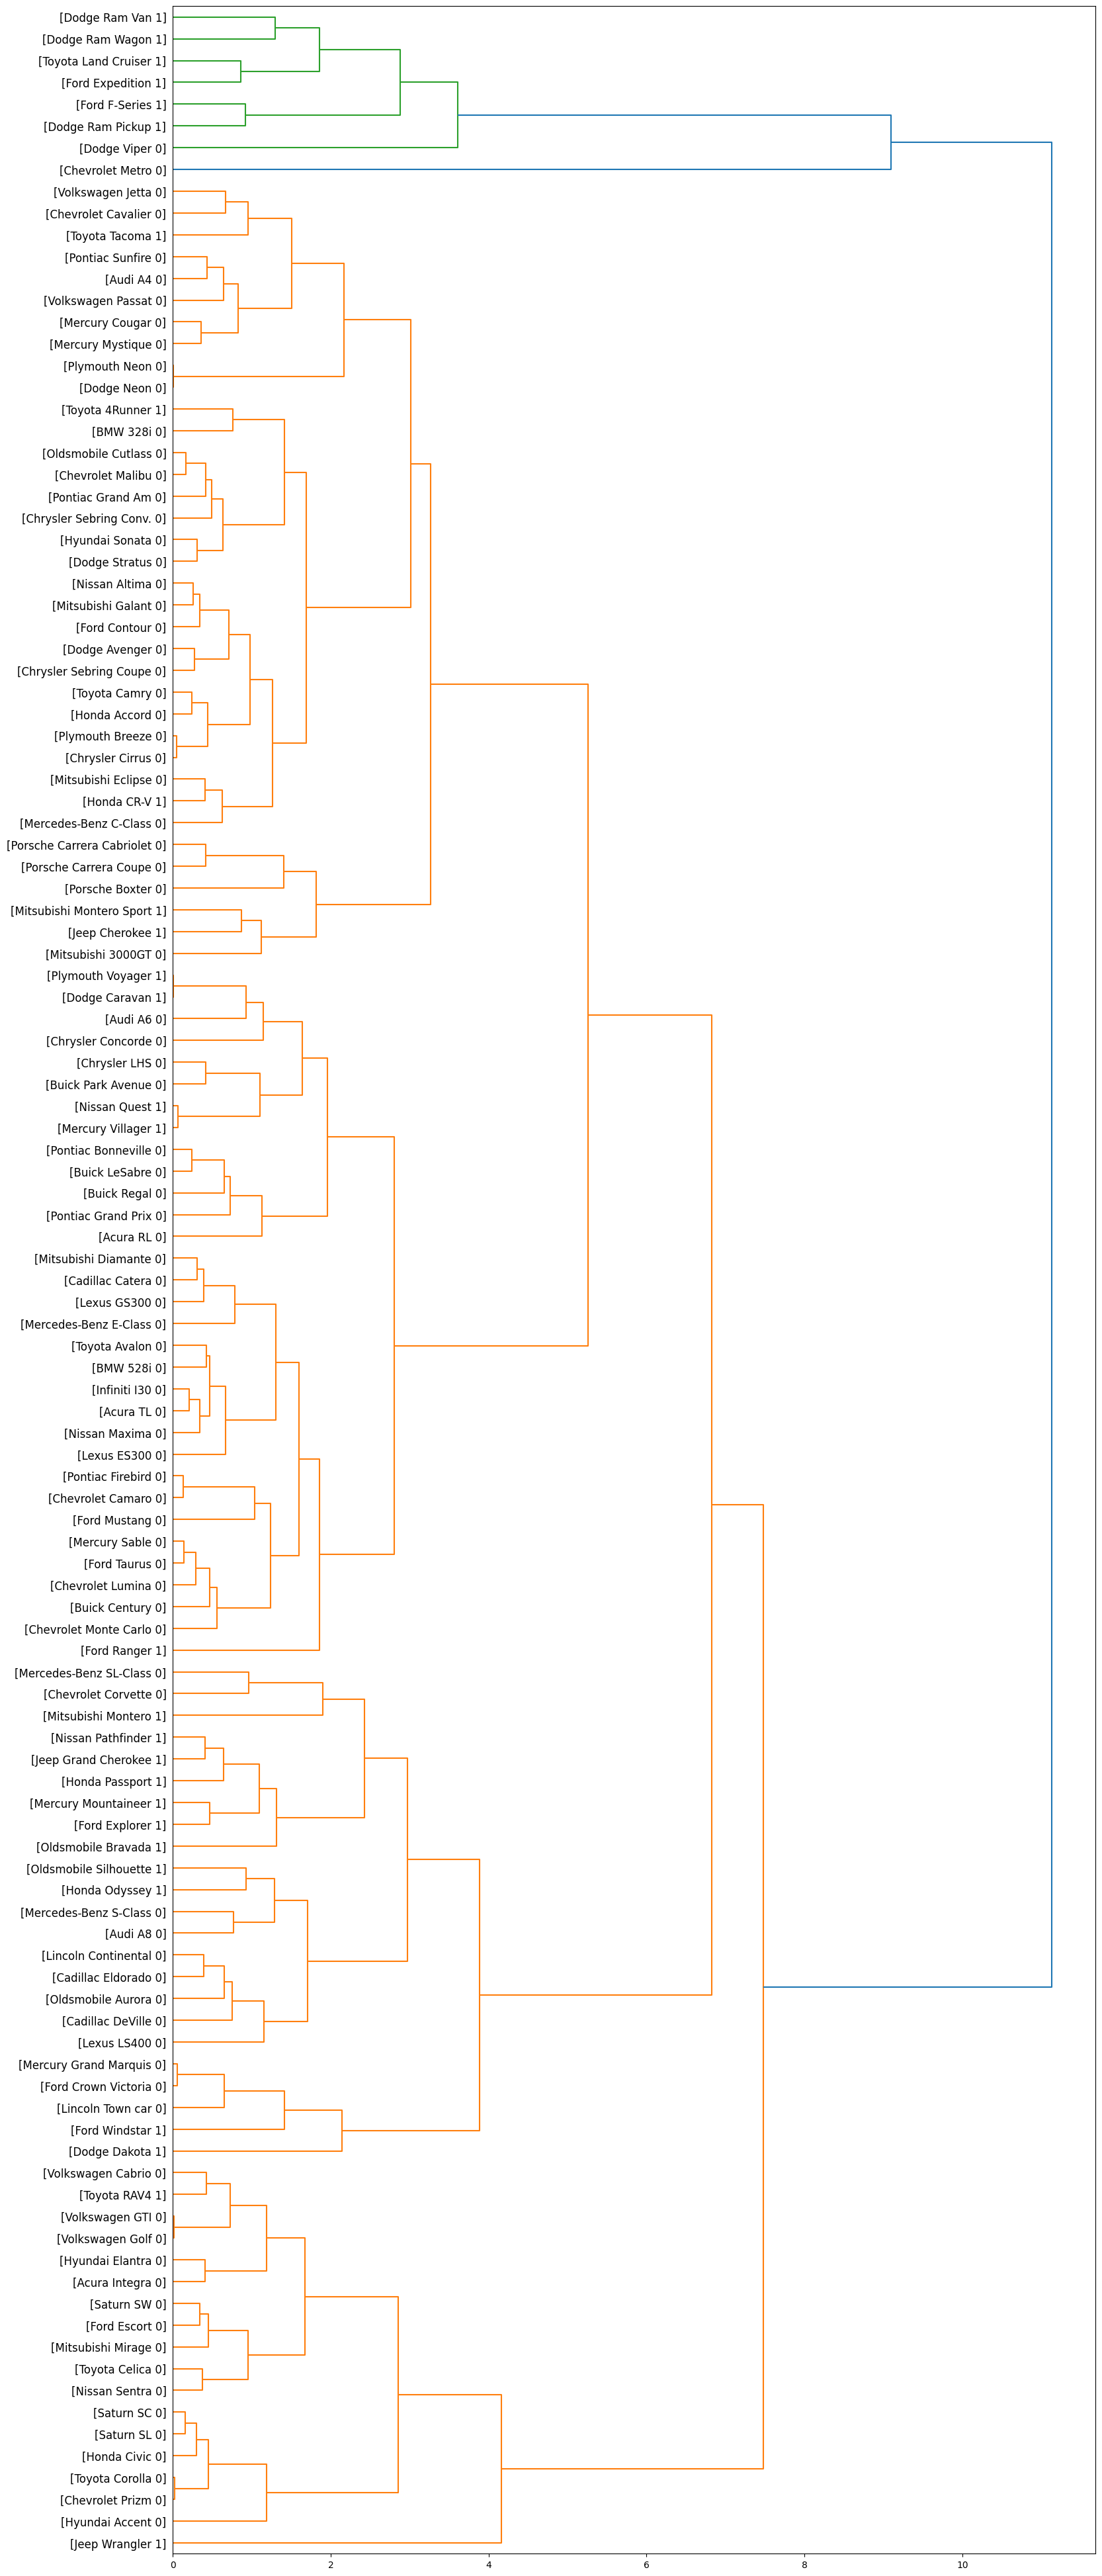

In [398]:
import pylab

fig = pylab.figure(figsize=(18, 50))

def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))


dendro = hierarchy.dendrogram(
    Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')


Clustering using _scikit-learn:_

In [403]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(feature_mtx, feature_mtx)

print(dist_matrix)

[[0.         0.585763   0.78573911 ... 0.28685109 0.25672507 0.19866125]
 [0.585763   0.         0.25892304 ... 0.36698373 0.66436916 0.62297526]
 [0.78573911 0.25892304 0.         ... 0.55085974 0.83285848 0.79502645]
 ...
 [0.28685109 0.36698373 0.55085974 ... 0.         0.41920634 0.35863999]
 [0.25672507 0.66436916 0.83285848 ... 0.41920634 0.         0.15212198]
 [0.19866125 0.62297526 0.79502645 ... 0.35863999 0.15212198 0.        ]]


In [404]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5368\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


Plot dendrogram:

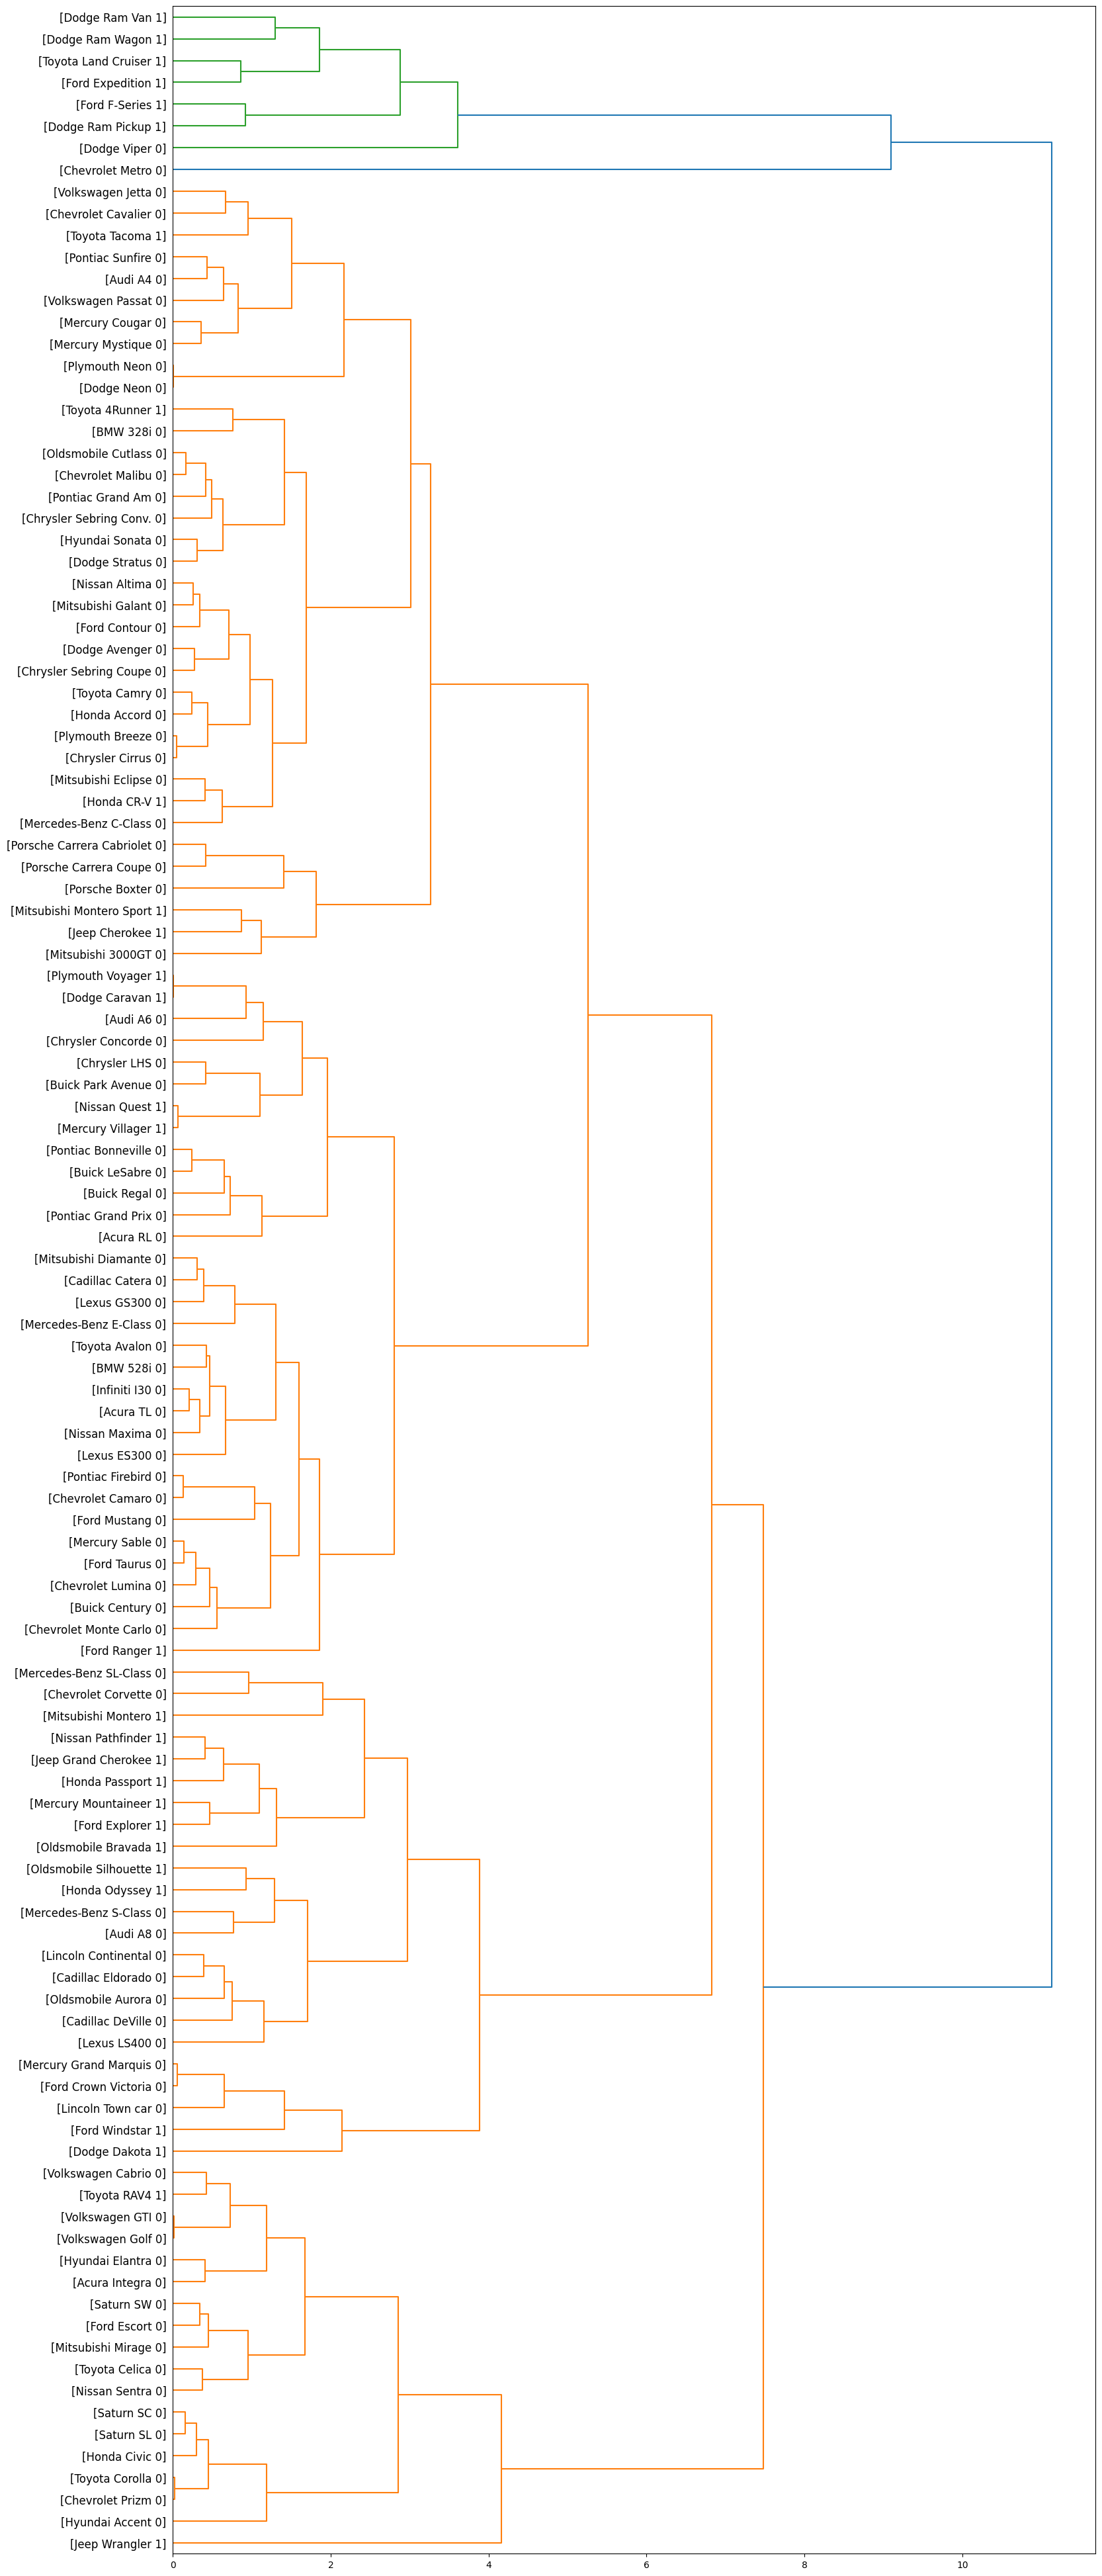

In [405]:
fig = pylab.figure(figsize=(18, 50))

def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))


dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf,
                              leaf_rotation=0, leaf_font_size=12, orientation='right')


In [406]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 2, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 1, 0,
       5, 4, 4, 2, 4, 2, 4, 4, 4, 3, 3, 3, 3, 1, 2, 0, 2, 4, 2, 1, 1, 1,
       3, 2, 3, 0, 4, 4, 1, 1, 0, 0, 4, 2, 0, 4, 1, 2, 2, 1, 1, 1, 0, 4,
       4, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 4, 2, 1, 1, 0, 4, 2, 2, 1, 4, 1,
       1, 1, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 4, 2, 0, 4, 0,
       4, 3, 0, 4, 4, 0, 0], dtype=int64)

In [407]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,4
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,2


Plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

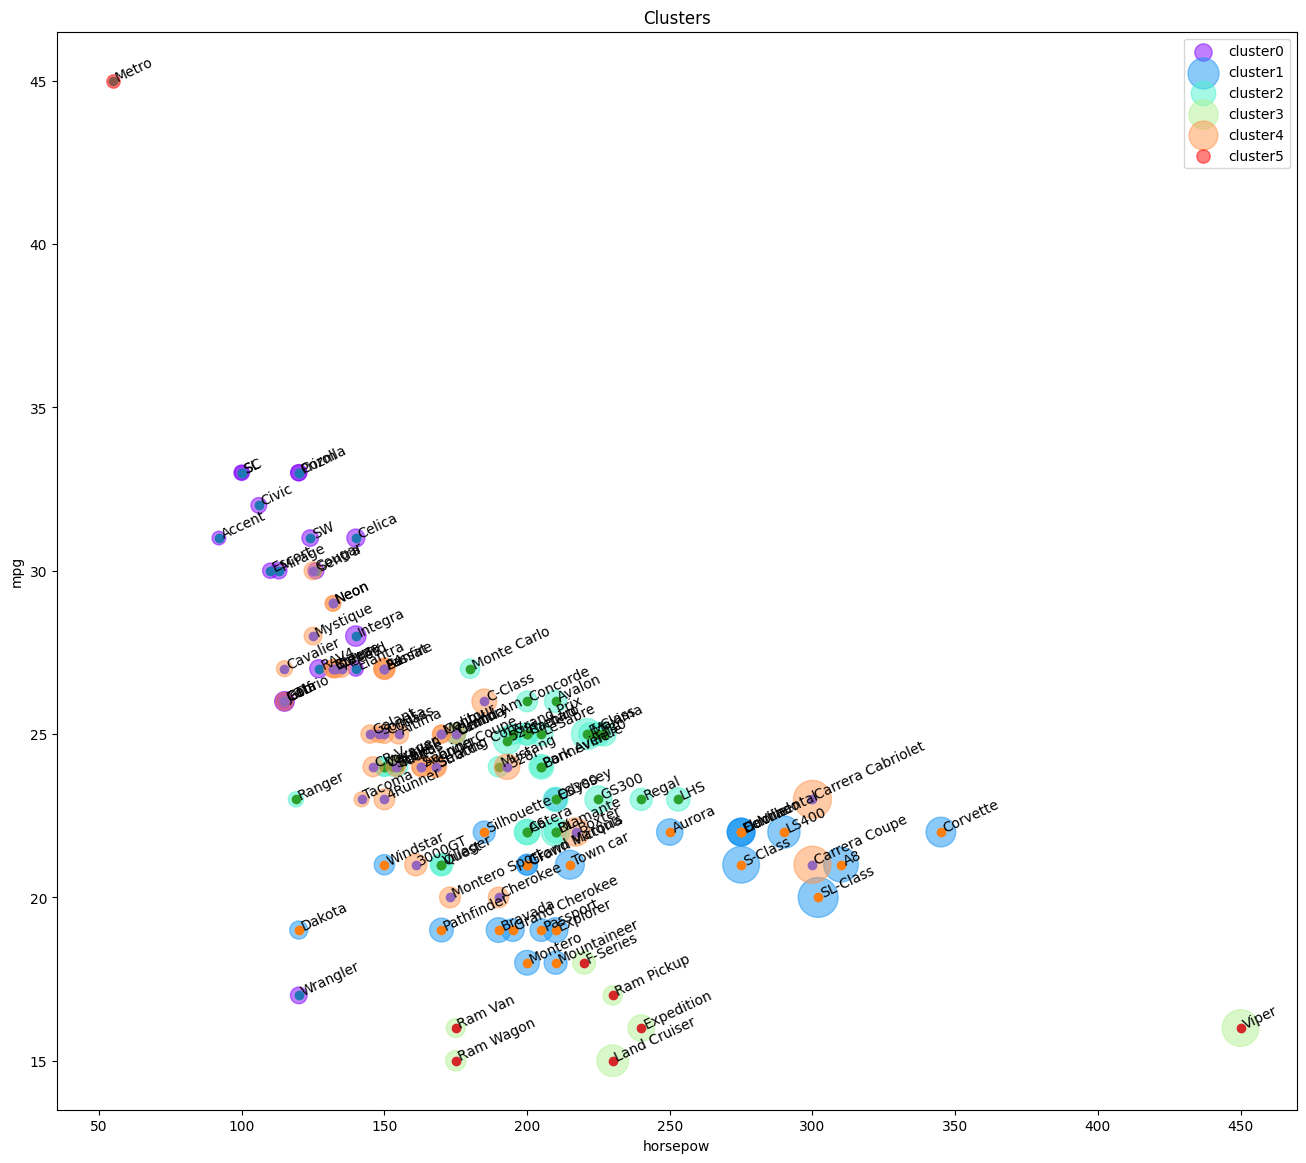

In [414]:
import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i],
                 str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10,
                c=color, label='cluster'+str(label), alpha=0.5)
  # plt.scatter(subset.horsepow, subset.mpg)


plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show()

In [416]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     16
          1.0      2
1         0.0     12
          1.0     11
2         0.0     27
          1.0      5
3         0.0      1
          1.0      6
4         0.0     31
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [417]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

C:\Users\DELL\AppData\Local\Temp\ipykernel_5368\2585305412.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   117.250000  1.850000  30.000000  14.330125
         1.0   123.500000  2.250000  22.000000  15.674000
1        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   185.909091  3.518182  19.636364  26.856727
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   151.800000  2.780000  22.600000  19.874800
3        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
4        0.0   161.645161  2.451613  25.483871  23.390516
         1.0   160.200000  2.820000  22.000000  19.702600
5        0.0    55.000000  1.000000  45.000000   9.235000

Plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

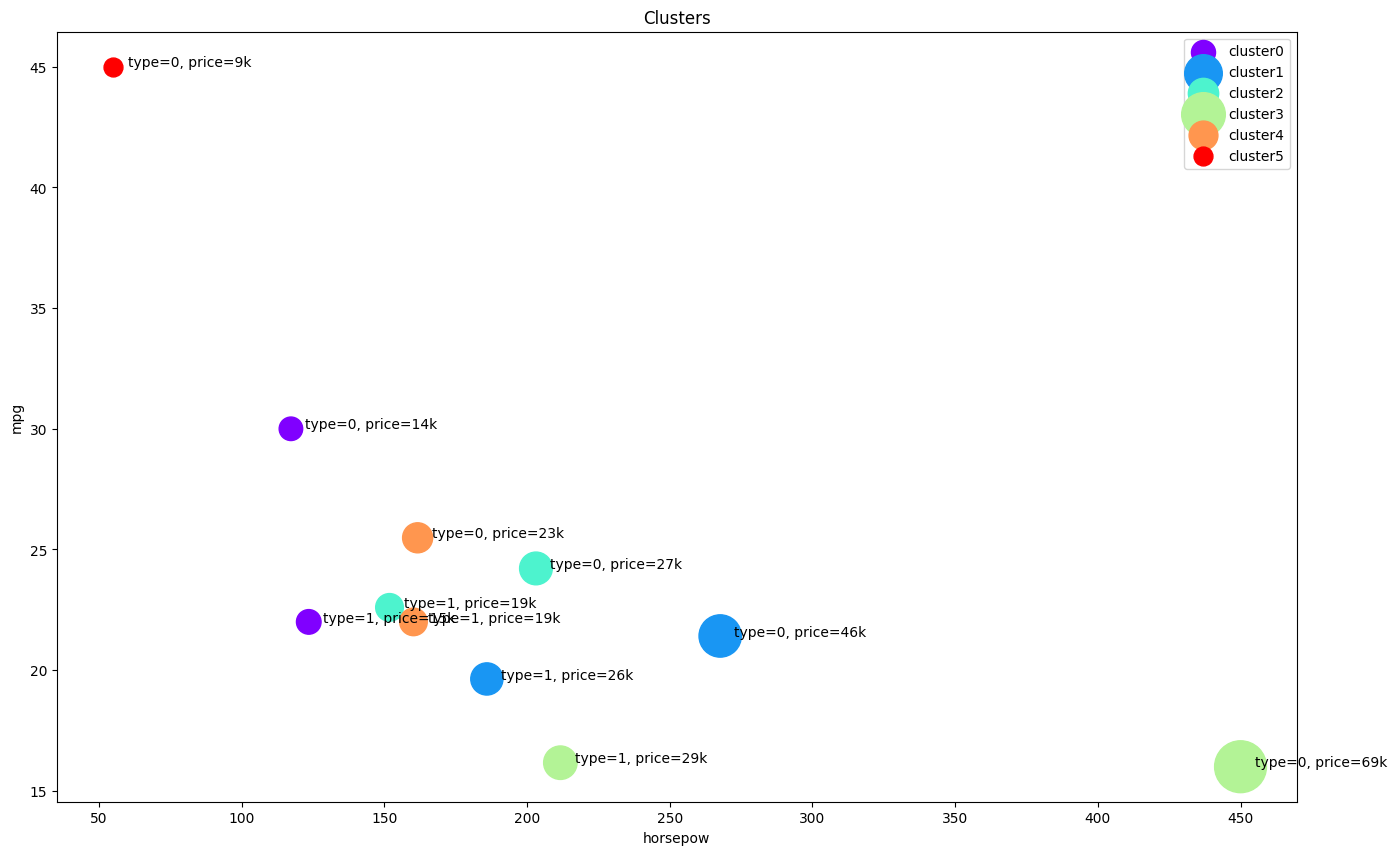

In [418]:
plt.figure(figsize=(16, 10))

for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2],
                 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg,
                s=subset.price*20, c=color, label='cluster'+str(label))


plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


### <a id='toc1_4_5_'></a>[Lesson 13: DBSCAN](#toc0_)